In [211]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
pd.set_option('display.max_rows', None)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
photoswitch = pd.read_csv("https://raw.githubusercontent.com/FlorianSong/MResAMS_DataAnalytics/main/final_project_data/photoswitches.csv")

#load RDKIT
rdk = pd.read_csv("https://raw.githubusercontent.com/FlorianSong/MResAMS_DataAnalytics/main/final_project_data/rdkit_descriptors.csv")
#load MORDRED
mrd = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/mordred_descriptors.csv")
#load MORGAN
mrg = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/morgan_fingerprints.csv")
#load photoswitches
phts = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/photoswitches.csv")


#don't include indexes or smiles
rdk=rdk.iloc[:,2:]
mrg=mrg.iloc[:,2:]
mrd=mrd.iloc[:,2:]
phts=phts.iloc[:,2:]

# RDKit

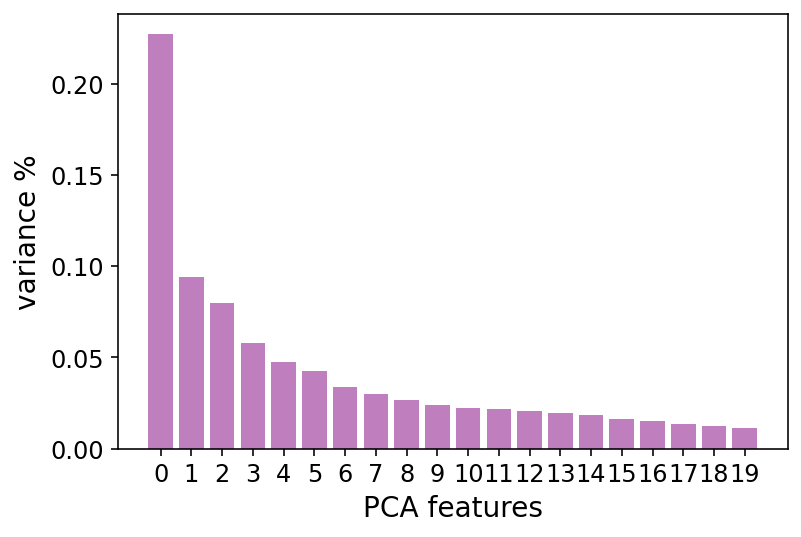

In [299]:
X_rdk = StandardScaler().fit_transform(rdk) 
pca_rdk = PCA(n_components=20) #how many principal components can we reduce to?
principalComponents = pca_rdk.fit_transform(X_rdk)
features = range(pca_rdk.n_components_)
plt.bar(features, pca_rdk.explained_variance_ratio_, color='purple', alpha = 0.5)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components_rdk = pd.DataFrame(principalComponents) #first component holds most variance

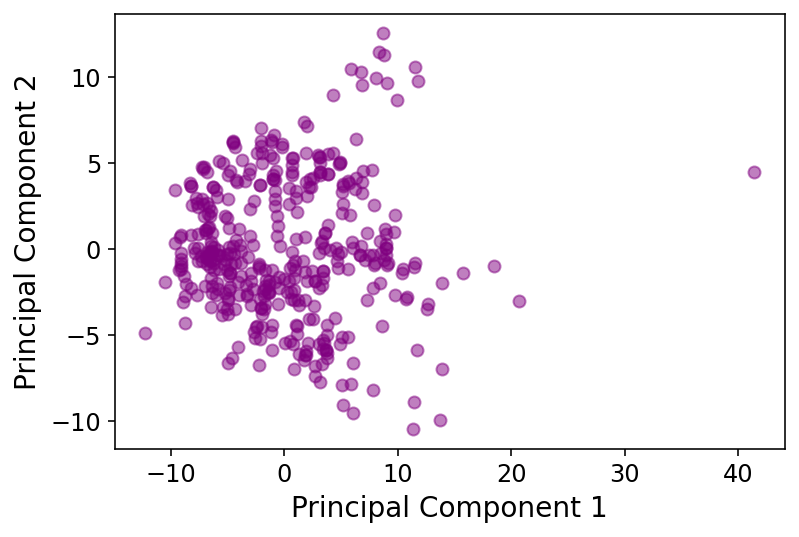

In [420]:
pca_rdk1 = PCA(2)  
twoD_rdk = pca_rdk1.fit_transform(X_rdk) #reduce to two dimensions
#print(rdk.shape)
#print(twoD_rdk.shape) #confirm dimensionality reduction
f = plt.figure()
plt.scatter(twoD_rdk[:,0], twoD_rdk[:,1], alpha=.5, color='purple')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
f.savefig("RDKPCA1-new.png", bbox_inches='tight') #save as necessary

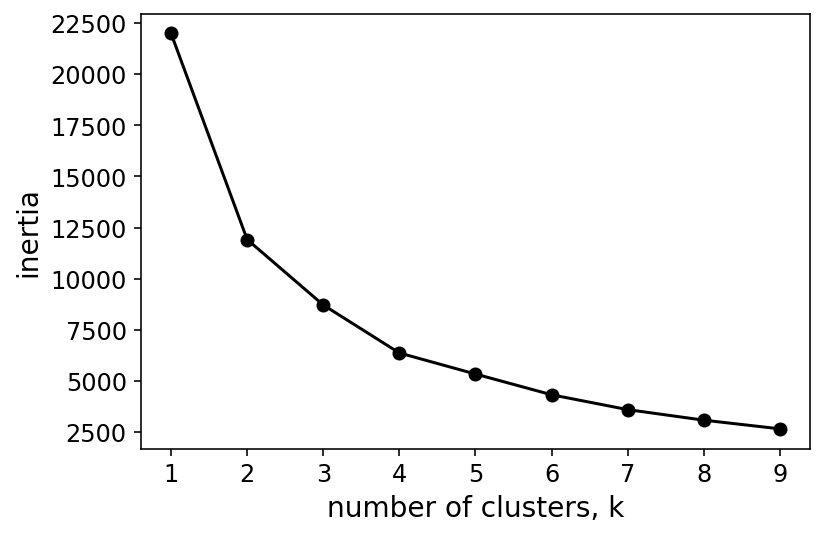

For n_clusters = 2 The average silhouette_score is : 0.4198568596163398
For n_clusters = 3 The average silhouette_score is : 0.4177787429834991
For n_clusters = 4 The average silhouette_score is : 0.4311737224425955
For n_clusters = 5 The average silhouette_score is : 0.41678097292046556
For n_clusters = 6 The average silhouette_score is : 0.4193084025275585
For n_clusters = 7 The average silhouette_score is : 0.3848686936701572
For n_clusters = 8 The average silhouette_score is : 0.39569125724376575
For n_clusters = 9 The average silhouette_score is : 0.3966260105602915
For n_clusters = 10 The average silhouette_score is : 0.39822389890610627


In [421]:
#chosing number of clusters based on silhouette scores / elbow point of inertia
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(twoD_rdk)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 4

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(twoD_rdk[:])
    silhouette_avg = silhouette_score(twoD_rdk[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
#opt clusters = 4

In [305]:
np.amax(twoD_rdk) # maximum value is 41.428043381662704, this corresponds to index 62, this is the obvious outlier
np.where(twoD_rdk == 41.428043381662704)
pca_rdk1.explained_variance_ratio_

array([0.22718791, 0.09417732])

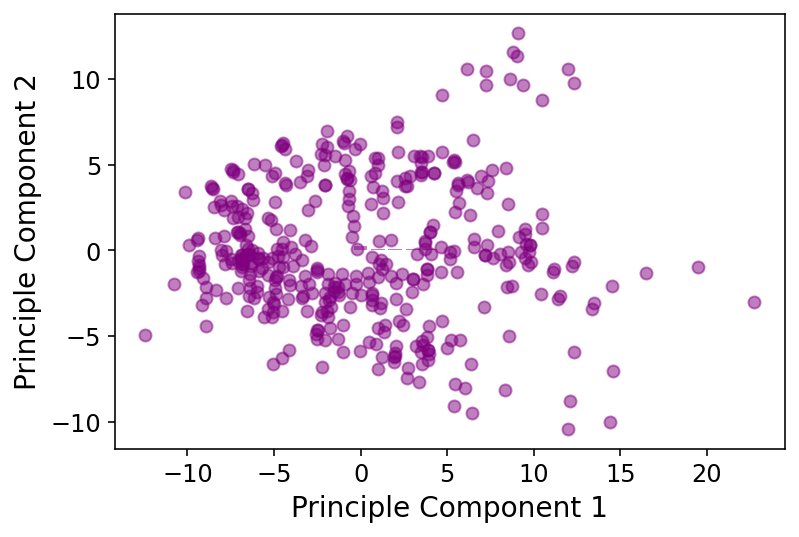

In [295]:
rdk_new = rdk.drop(62)  
X_rdk_new = StandardScaler().fit_transform(rdk_new)
pca_rdk_new = PCA(n_components=20)
principalComponents = pca_rdk_new.fit_transform(X_rdk_new)
features = range(pca_rdk_new.n_components_)
plt.bar(features, pca_rdk_new.explained_variance_ratio_, color='purple', alpha = 0.5)
plt.xlabel('PCA features')
plt.ylabel('variance %')
#plt.xticks(features)
PCA_components_rdk = pd.DataFrame(principalComponents)
pca_rdk1_new = PCA(2)  
twoD_rdk_new = pca_rdk1_new.fit_transform(X_rdk_new)
#print(rdk.shape)
#print(twoD_rdk.shape) #confirm dimensionality reduction
#f = plt.figure()
plt.scatter(twoD_rdk_new[:,0], twoD_rdk_new[:,1], alpha=.5, color='purple')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()
#f.savefig("RDKPCA2.png", bbox_inches='tight')

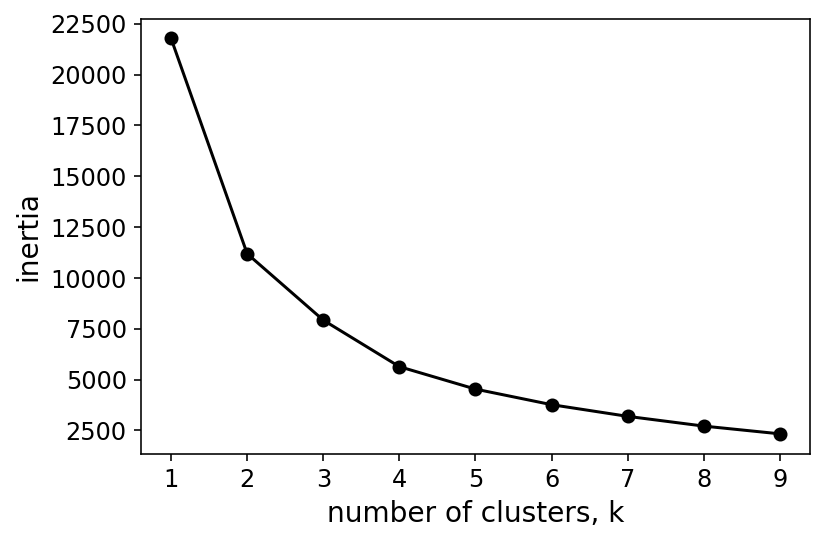

For n_clusters = 2 The average silhouette_score is : 0.4273103294587418
For n_clusters = 3 The average silhouette_score is : 0.42296976322054347
For n_clusters = 4 The average silhouette_score is : 0.4336722683463849
For n_clusters = 5 The average silhouette_score is : 0.42083733684281394
For n_clusters = 6 The average silhouette_score is : 0.3875021203362503
For n_clusters = 7 The average silhouette_score is : 0.4002407124731467
For n_clusters = 8 The average silhouette_score is : 0.3982638159461984
For n_clusters = 9 The average silhouette_score is : 0.3960832079111574
For n_clusters = 10 The average silhouette_score is : 0.4108394935853206


In [325]:
#chosing number of clusters based on silhouette scores / elbow point of inertia
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(twoD_rdk_new)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 4

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(twoD_rdk_new[:])
    silhouette_avg = silhouette_score(twoD_rdk_new[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
#opt clusters = 4

Text(0, 0.5, 'Principle Compenent 2')

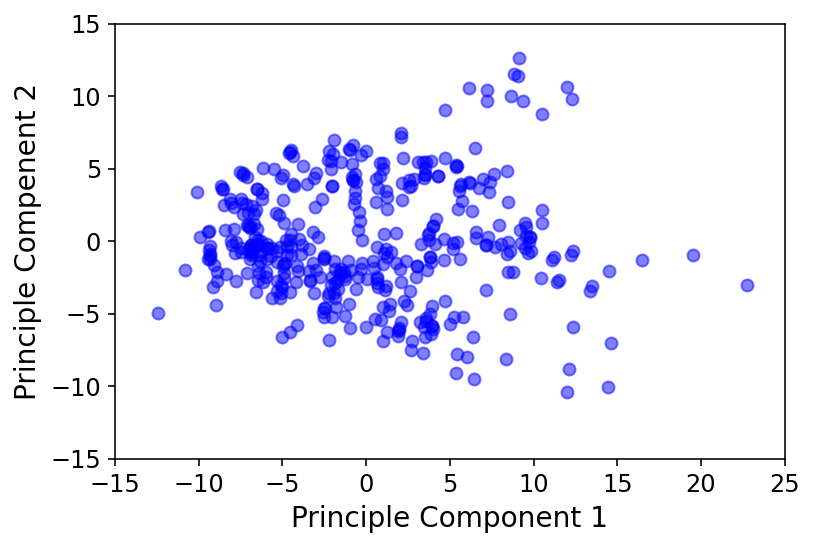

In [426]:
X_rdk_22 = StandardScaler().fit_transform(twoD_rdk_new)
y_rdk_22 = KMeans(4).fit_predict(X_rdk_22)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_rdk_22, y_rdk_22)

#tsne = TSNE().fit_transform(X_rdk) #default is two dimensions
#f = plt.figure()
plt.scatter(twoD_rdk_new[:,0], twoD_rdk_new[:,1], color = "blue", alpha = 0.5)
plt.axis([-15,25,-15,15])
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Compenent 2')



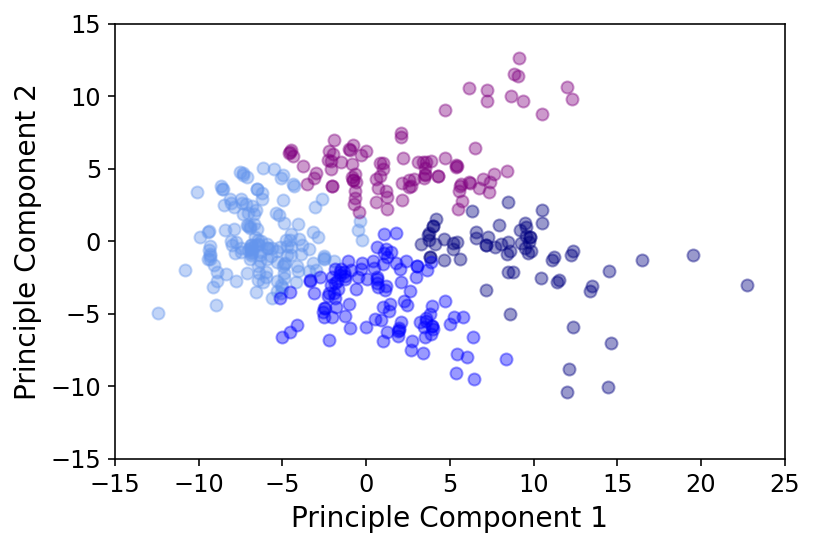

In [427]:
#f.savefig("MRD PCA 3.png", bbox_inches='tight')
f = plt.figure()
plt.scatter(twoD_rdk_new[:,0][y_rdk_22==0], twoD_rdk_new[:,1][y_rdk_22==0], color = "cornflowerblue", marker ="o", alpha=0.4)
plt.scatter(twoD_rdk_new[:,0][y_rdk_22==1], twoD_rdk_new[:,1][y_rdk_22==1], color = "navy", marker ="o", alpha=0.4)
plt.scatter(twoD_rdk_new[:,0][y_rdk_22==2], twoD_rdk_new[:,1][y_rdk_22==2], color = "purple", marker = "o",alpha=0.4)
plt.scatter(twoD_rdk_new[:,0][y_rdk_22==3], twoD_rdk_new[:,1][y_rdk_22==3], color = "blue", marker = "o",alpha=0.4)

plt.axis([-15,25,-15,15])
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
f.savefig("MRGPCAclusters1--new.png", bbox_inches='tight')
#indicate the three different clusters

# Mordred

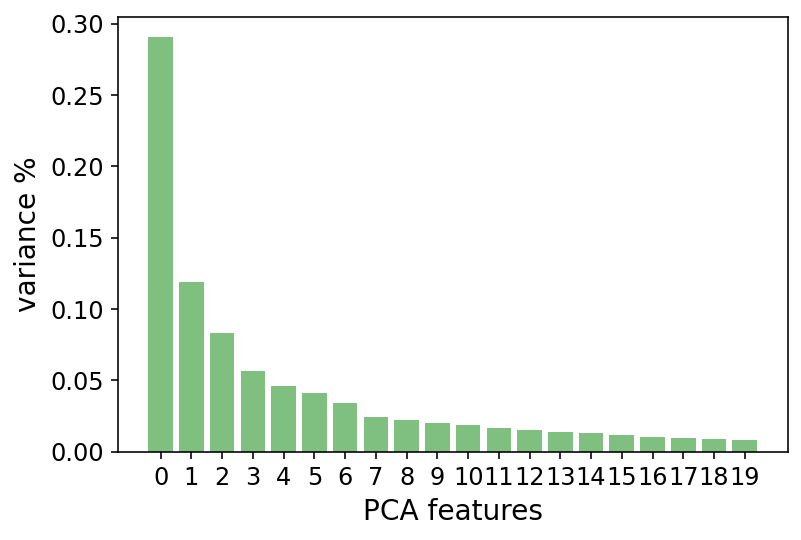

In [306]:
X_mrd = StandardScaler().fit_transform(mrd) #repeat for mordred decriptors
pca_mrd = PCA(n_components=20) 
principalComponents_mrd= pca_mrd.fit_transform(X_mrd)
features_mrd = range(pca_mrd.n_components_)
plt.bar(features, pca_mrd.explained_variance_ratio_, color='green', alpha = 0.5)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features_mrd)
PCA_components_mrd = pd.DataFrame(principalComponents_mrd)

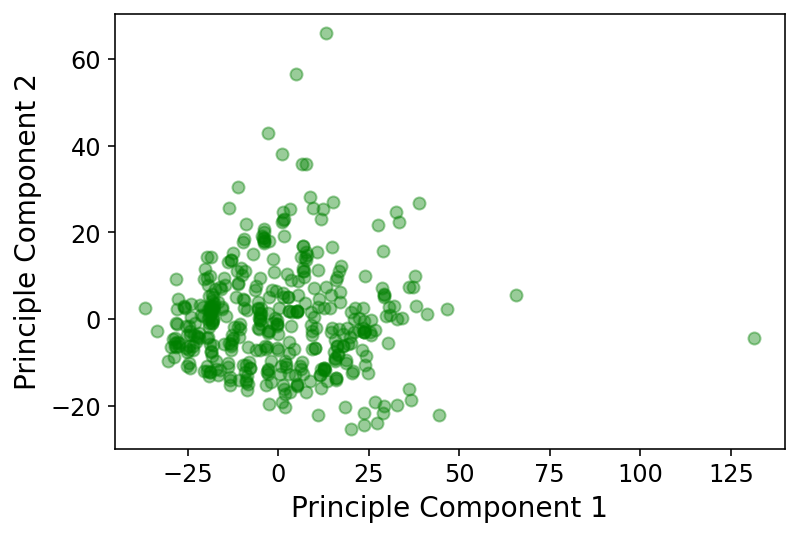

array([0.29043388, 0.11875416])

In [418]:
pca_mrd1 = PCA(2)  
twoD_mrd = pca_mrd1.fit_transform(X_mrd)
f = plt.figure()
plt.scatter(twoD_mrd[:,0], twoD_mrd[:,1], alpha=.4, color='green')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()
f.savefig("MORDREDPCA1-new2.png", bbox_inches='tight')
pca_mrd1.explained_variance_ratio_

In [309]:
np.amax(twoD_mrd) # maximum value is 131.479447374561, this corresponds to index 62, note this is PC1 max
np.where(twoD_mrd == 131.479447374561)
#62 is the same index as RDKit outlier

(array([62], dtype=int64), array([0], dtype=int64))

In [311]:
np.amax(twoD_mrd[:,1])# # maximum value is 65.79960798242419, this corresponds to index 35, note this is PC2 max, not significant
np.where(twoD_mrd == 65.79960798242419)

(array([35], dtype=int64), array([1], dtype=int64))

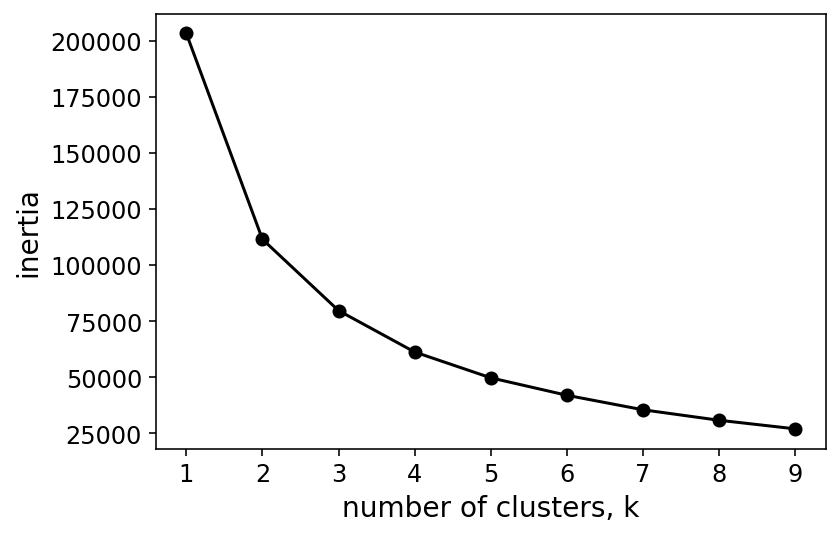

For n_clusters = 2 The average silhouette_score is : 0.4237804205282977
For n_clusters = 3 The average silhouette_score is : 0.4227948684626446
For n_clusters = 4 The average silhouette_score is : 0.392913808300949
For n_clusters = 5 The average silhouette_score is : 0.3953423752379871
For n_clusters = 6 The average silhouette_score is : 0.38742238531605067
For n_clusters = 7 The average silhouette_score is : 0.37520234742870234
For n_clusters = 8 The average silhouette_score is : 0.357010614715114
For n_clusters = 9 The average silhouette_score is : 0.35580613438733827
For n_clusters = 10 The average silhouette_score is : 0.3723260787046225


In [342]:
#chosing number of clusters based on silhouette scores / elbow point of inertia
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(twoD_mrd)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 2

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(twoD_mrd[:])
    silhouette_avg = silhouette_score(twoD_mrd[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
#opt clusters = 2

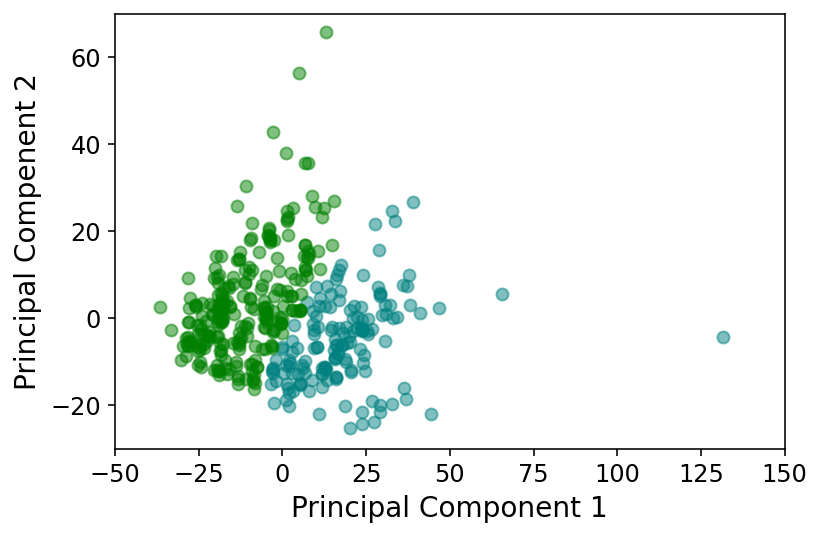

In [419]:
X_mrd_22 = StandardScaler().fit_transform(twoD_mrd)
y_mrd_22 = KMeans(2).fit_predict(X_mrd_22)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_mrd_22, y_mrd_22)


f = plt.figure()

plt.scatter(twoD_mrd[:,0][y_mrd_22==0], twoD_mrd[:,1][y_mrd_22==0], color = "teal", alpha = 0.5)
plt.scatter(twoD_mrd[:,0][y_mrd_22==1], twoD_mrd[:,1][y_mrd_22==1], color = "green", alpha = 0.5)
plt.axis([-50,150,-30,70])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Compenent 2')
f.savefig("MORDREDPCA1-new2-1.png", bbox_inches='tight')

# Morgan

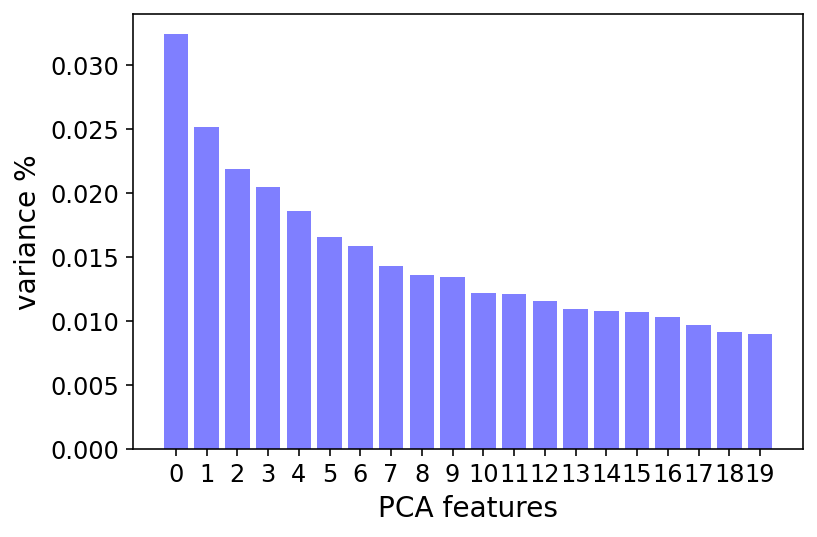

In [315]:
X_mrg = StandardScaler().fit_transform(mrg)
pca_mrg = PCA(n_components=20)
principalComponents_mrg= pca_mrg.fit_transform(X_mrg)
features_mrg = range(pca_mrg.n_components_)
plt.bar(features, pca_mrg.explained_variance_ratio_, color='blue', alpha = 0.5)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features_mrg)
PCA_components_mrg = pd.DataFrame(principalComponents_mrg) #when repeating for morgan, much variance is held in 1st two components

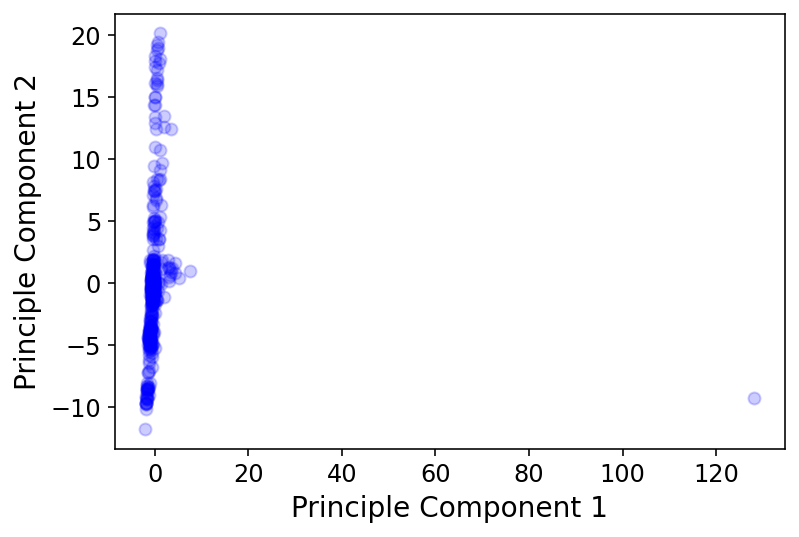

array([0.03237782, 0.02517323])

In [417]:
pca_mrg1 = PCA(2)
twoD_mrg = pca_mrg1.fit_transform(X_mrg)
f = plt.figure()
plt.scatter(twoD_mrg[:,0], twoD_mrg[:,1], alpha=.2, color='blue')
#plt.scatter(-1.1987,-0.131, alpha=.6, color='red')
#plt.scatter(-1.0550009 , -0.10984453, alpha=.6, color='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
f.savefig("MORGANPCA1-new.png", bbox_inches='tight') #the outliers from before aren't separated from the rest of the data (located from next two cells)
pca_mrg1.explained_variance_ratio_

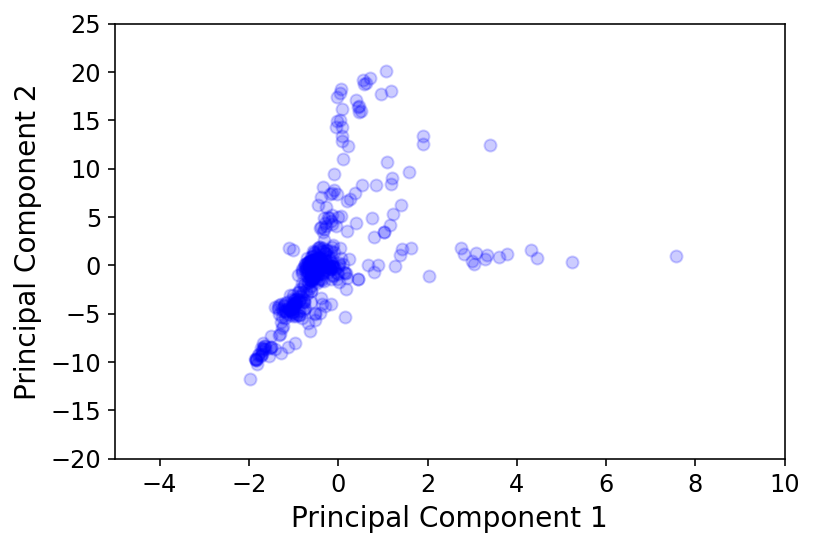

In [432]:
f = plt.figure()
plt.scatter(twoD_mrg[:,0], twoD_mrg[:,1], alpha=.2, color='blue')
#plt.scatter(-1.1987,-0.131, alpha=.6, color='red')
#plt.scatter(-1.0550009 , -0.10984453, alpha=.6, color='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axis([-5,10,-20,25])
plt.show()
f.savefig("MORGANPCA1-ne---w.png", bbox_inches='tight') #the outliers from before aren't separated from the rest of the data (located from next two cells)


In [322]:
np.amax(twoD_mrg) # maximum value is 128.12634963273595, this corresponds to index 62, note this is PC1 max
np.where(twoD_mrg == 128.12634963273595)
#62 is the same index as RDKit outlier

(array([62], dtype=int64), array([0], dtype=int64))

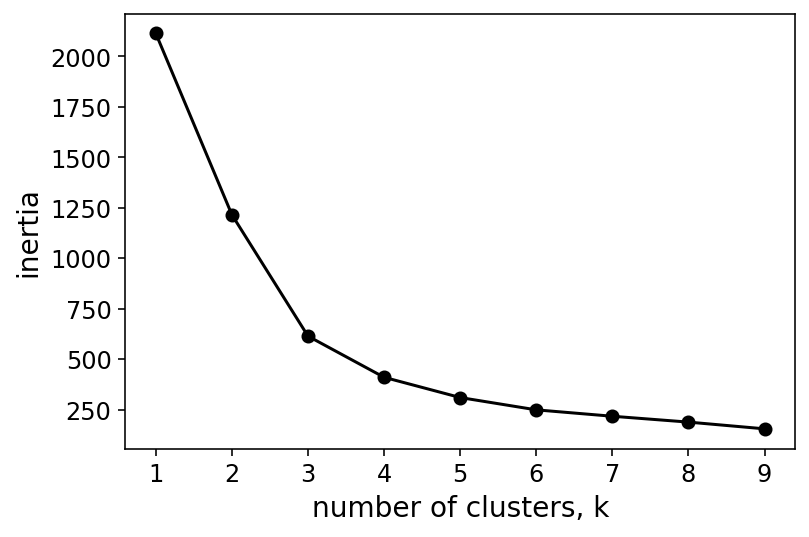

For n_clusters = 2 The average silhouette_score is : 0.496293542605035
For n_clusters = 3 The average silhouette_score is : 0.5802979479719782
For n_clusters = 4 The average silhouette_score is : 0.5342119310877245
For n_clusters = 5 The average silhouette_score is : 0.540172982027024
For n_clusters = 6 The average silhouette_score is : 0.41879232718248754
For n_clusters = 7 The average silhouette_score is : 0.4205163083376522
For n_clusters = 8 The average silhouette_score is : 0.4019707989343343
For n_clusters = 9 The average silhouette_score is : 0.41384445076520965
For n_clusters = 10 The average silhouette_score is : 0.4360713633061907


In [169]:
#chosing number of clusters based on silhouette scores / elbow point of inertia
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(twoD_mrg)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 5

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(twoD_mrg[:])
    silhouette_avg = silhouette_score(twoD_mrg[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
#opt clusters = 3

In [376]:
PS_new_2 = phts.copy()
PS_new_2['Mordred Clusters'] = y_mrd_22
PS_new_2 = PS_new_2.drop(62)
PS_new_2['RDKit Clusters'] = y_rdk_22
#PS_new_2['Mordred Clusters'] = y_mrd_22.drop(62)
#PS_new_2['RDKit Clusters'] = y_rdk_22
PS_new_2

rate of thermal isomerisation from Z-E in s-1  \
0                                     2.100000e-07   
1                                     3.800000e-07   
2                                     1.100000e-07   
3                                     1.500000e-06   
4                                     7.600000e-09   
5                                     7.700000e-07   
6                                     7.400000e-07   
7                                     1.600000e-05   
8                                     2.200000e-06   
9                                     7.600000e-04   
10                                    3.300000e-02   
11                                    6.500000e-05   
12                                    2.200000e-05   
13                                    3.300000e-06   
14                                    1.200000e-06   
15                                             NaN   
16                                             NaN   
17                                             NaN   
18                                             NaN   
19                                             NaN   
20                                             NaN   
21                                             NaN   
22                                             NaN   
23                                             NaN   
24                                             NaN   
25                                             NaN   
26                                    4.800000e-10   
27                                    7.840000e-08   
28                                    6.950000e-06   
29                                    7.220000e-08   
30                                    1.750000e-05   
31                                    7.700000e-06   
32                                    2.090000e-06   
33                                    9.600000e-06   
34                                    7.130000e-06   
35                                    4.100000e-05   
36                                    9.170000e-06   
37                                    1.280000e-05   
38                                    6.420000e-06   
39                                    2.410000e-05   
40                                    2.750000e-05   
41                                    1.260000e-05   
42                                    7.760000e-06   
43                                    9.630000e-06   
44                                    1.690000e-05   
45                                    1.150000e-05   
46                                    1.720000e-05   
47                                    1.380000e-05   
48                                    1.310000e-05   
49                                    1.910000e-05   
50                                    1.470000e-05   
51                                    1.890000e-05   
52                                    1.210000e-05   
53                                    1.013370e-04   
54                                    5.730000e-07   
55                                    8.770000e-09   
56                                    8.440000e-07   
57                                    1.930000e-06   
58                                    6.090000e-07   
59                                    1.670000e-06   
60                                    6.210000e-06   
61                                    9.870000e-07   
63                                    4.550000e-05   
64                                    1.850000e-03   
65                                    1.620000e-03   
66                                    4.030000e-03   
67                                    1.140000e-02   
68                                    1.670000e-03   
69                                    4.290000e-03   
70                                    5.870000e-02   
71                                    1.790000e-03   
72                                    2.880000e-03   
73                                    3.280000e-01   
74       

In [378]:
plt.scatter(PS_new_2.iloc[:,-1],PS_new_2.iloc[:,-2])

# TSNE dimensionality reduction

# RDKit

Text(0, 0.5, 't-SNE 2')

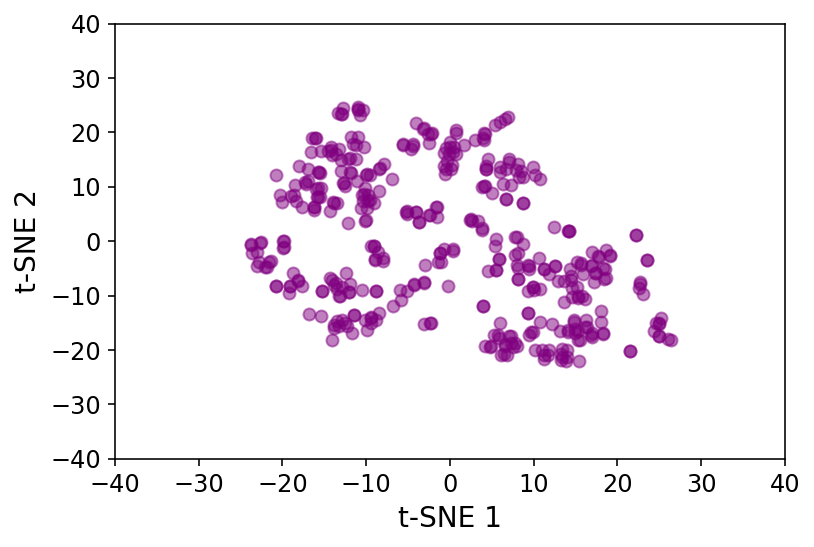

In [388]:
X_rdk = StandardScaler().fit_transform(rdk) #dimensionality reduction by PCA didn't look great; too much variance in first component
y_rdk = KMeans(2).fit_predict(X_rdk)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_rdk, y_rdk)

tsne = TSNE().fit_transform(X_rdk) #default is two dimensions
#f = plt.figure()
plt.scatter(tsne[:,0],tsne[:,1], color = "purple", alpha = 0.5)
plt.axis([-40, 40, -40, 40])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
#f.savefig("RDKtsne2.11.png", bbox_inches='tight')

In [389]:
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(tsne)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 2

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(tsne[:])
    silhouette_avg = silhouette_score(tsne[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.4686781
For n_clusters = 3 The average silhouette_score is : 0.4916568
For n_clusters = 4 The average silhouette_score is : 0.48097658
For n_clusters = 5 The average silhouette_score is : 0.4487557
For n_clusters = 6 The average silhouette_score is : 0.4457169
For n_clusters = 7 The average silhouette_score is : 0.44043496
For n_clusters = 8 The average silhouette_score is : 0.43378893
For n_clusters = 9 The average silhouette_score is : 0.42494032
For n_clusters = 10 The average silhouette_score is : 0.42669377


In [390]:
#f = plt.figure()
plt.scatter(tsne[:,0][y_rdk==0], tsne[:,1][y_rdk==0], color = "purple", marker ="o", alpha=0.4)
plt.scatter(tsne[:,0][y_rdk==1], tsne[:,1][y_rdk==1], color = "navy", marker ="o", alpha=0.4)
#plt.scatter(tsne[:,0][y_rdk==2], tsne[:,1][y_rdk==2], color = "mediumorchid", marker = "o",alpha=0.4)
#plt.scatter(tsne[:,0][y_rdk==3], tsne[:,1][y_rdk==3], color = "palevioletred", marker = "o", alpha=0.4)
#plt.scatter(tsne[:,0][y_rdk==4], tsne[:,1][y_rdk==4], "rebeccapurple", alpha=0.2)
plt.axis([-40, 40, -40, 40])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
#f.savefig("RDKtsneclusters2-1.png", bbox_inches='tight')

Text(0, 0.5, 't-SNE 2')

# Mordred

In [391]:
X_mrd = StandardScaler().fit_transform(mrd)
y_mrd = KMeans(3).fit_predict(X_mrd)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_mrd, y_mrd)

tsne_mrd = TSNE().fit_transform(X_mrd) #default is two dimensions
f = plt.figure()
plt.scatter(tsne_mrd[:,0],tsne_mrd[:,1], color = "green", alpha = 0.5)
plt.axis([-40, 40, -40, 40])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
f.savefig("MRDtsne2.png-new", bbox_inches='tight')

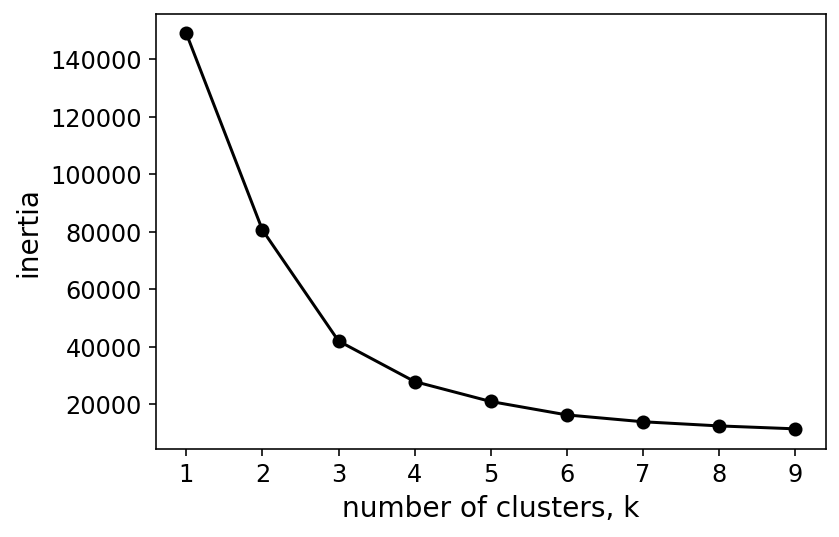

For n_clusters = 2 The average silhouette_score is : 0.4281128
For n_clusters = 3 The average silhouette_score is : 0.5227314
For n_clusters = 4 The average silhouette_score is : 0.4834463
For n_clusters = 5 The average silhouette_score is : 0.4800141
For n_clusters = 6 The average silhouette_score is : 0.5046591
For n_clusters = 7 The average silhouette_score is : 0.46513063
For n_clusters = 8 The average silhouette_score is : 0.46419665
For n_clusters = 9 The average silhouette_score is : 0.44838974
For n_clusters = 10 The average silhouette_score is : 0.41129497


In [392]:
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(tsne_mrd)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 5

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(tsne_mrd[:])
    silhouette_avg = silhouette_score(tsne_mrd[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

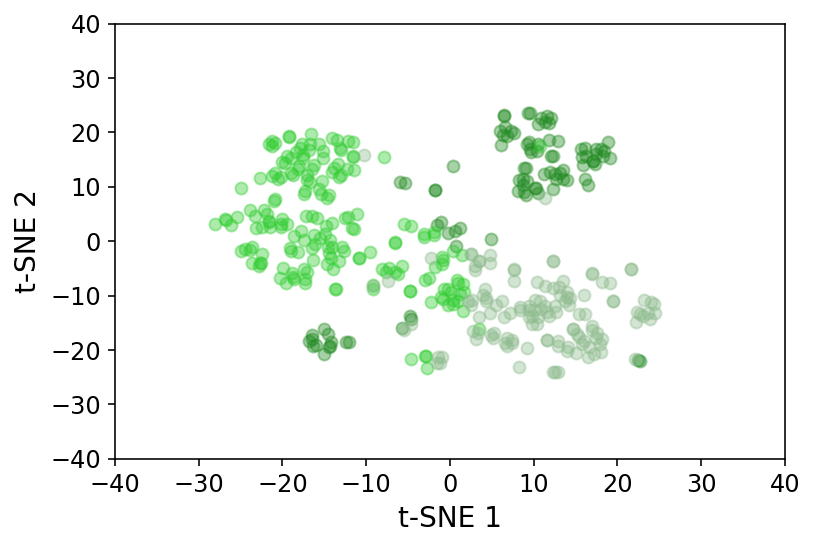

In [393]:
f = plt.figure()
plt.scatter(tsne_mrd[:,0][y_mrd==0], tsne_mrd[:,1][y_mrd==0], color = "forestgreen", marker ="o", alpha=0.4)
plt.scatter(tsne_mrd[:,0][y_mrd==1], tsne_mrd[:,1][y_mrd==1], color = "limegreen", marker ="o", alpha=0.4)
plt.scatter(tsne_mrd[:,0][y_mrd==2], tsne_mrd[:,1][y_mrd==2], color = "darkseagreen", marker = "o",alpha=0.4)
#plt.scatter(tsne[:,0][y_rdk==3], tsne[:,1][y_rdk==3], color = "palevioletred", marker = "o", alpha=0.4)
#plt.scatter(tsne[:,0][y_rdk==4], tsne[:,1][y_rdk==4], "rebeccapurple", alpha=0.2)
plt.axis([-40, 40, -40, 40])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
f.savefig("MRDtsneclusters-new.png", bbox_inches='tight')

# Morgan

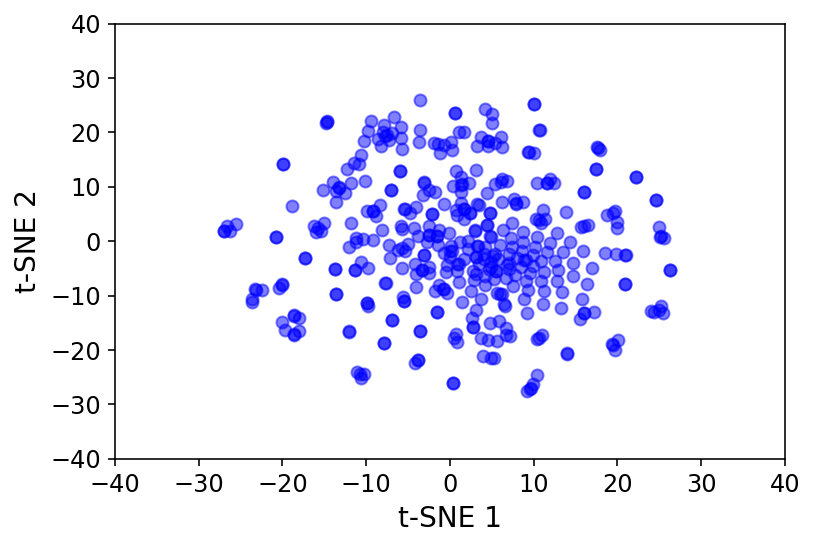

In [413]:
X_mrg = StandardScaler().fit_transform(mrg)
y_mrg = KMeans(6).fit_predict(X_mrg)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_mrg, y_mrg)

tsne_mrg = TSNE().fit_transform(X_mrg) #default is two dimensions
f = plt.figure()
plt.scatter(tsne_mrg[:,0],tsne_mrg[:,1], color = "blue", alpha = 0.5)
plt.axis([-40, 40, -40, 40])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
f.savefig("MRgtsne2-new.png", bbox_inches='tight')

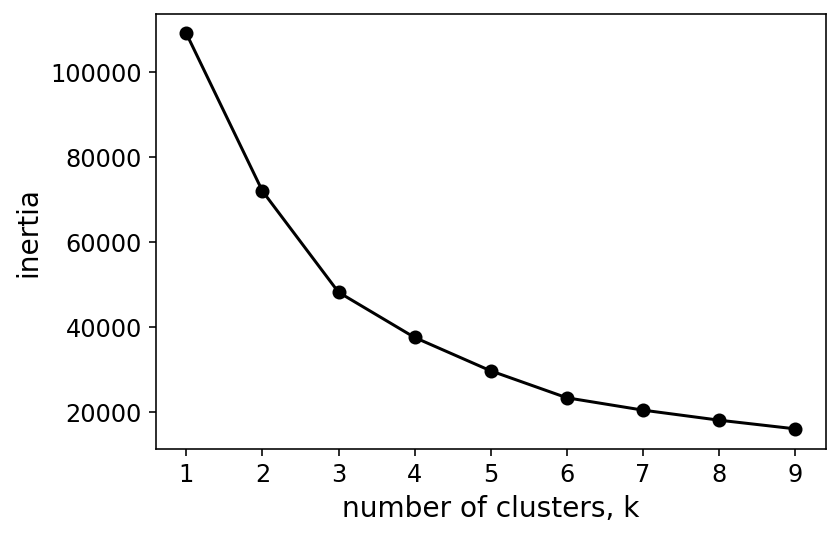

For n_clusters = 2 The average silhouette_score is : 0.31203866
For n_clusters = 3 The average silhouette_score is : 0.3382536
For n_clusters = 4 The average silhouette_score is : 0.32094762
For n_clusters = 5 The average silhouette_score is : 0.34390515
For n_clusters = 6 The average silhouette_score is : 0.37206942
For n_clusters = 7 The average silhouette_score is : 0.3587422
For n_clusters = 8 The average silhouette_score is : 0.3468326
For n_clusters = 9 The average silhouette_score is : 0.34200805
For n_clusters = 10 The average silhouette_score is : 0.34486333


In [157]:
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(tsne_mrg)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 6

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(tsne_mrg[:])
    silhouette_avg = silhouette_score(tsne_mrg[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

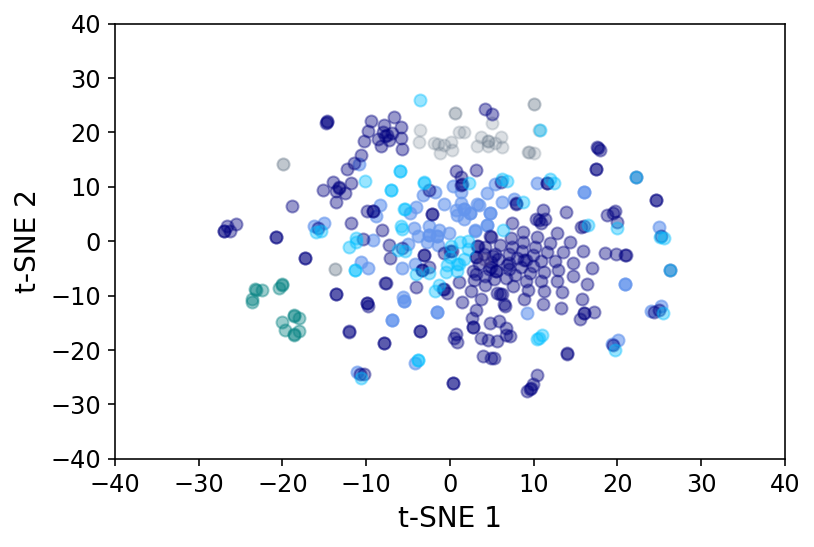

In [414]:
f = plt.figure()
plt.scatter(tsne_mrg[:,0][y_mrg==0], tsne_mrg[:,1][y_mrg==0], color = "slategray", marker ="o", alpha=0.25)
plt.scatter(tsne_mrg[:,0][y_mrg==1], tsne_mrg[:,1][y_mrg==1], color = "cornflowerblue", marker ="o", alpha=0.6)
plt.scatter(tsne_mrg[:,0][y_mrg==2], tsne_mrg[:,1][y_mrg==2], color = "navy", marker = "o",alpha=0.4)
plt.scatter(tsne_mrg[:,0][y_mrg==3], tsne_mrg[:,1][y_mrg==3], color = "darkslateblue", marker ="o", alpha=0.4)
plt.scatter(tsne_mrg[:,0][y_mrg==4], tsne_mrg[:,1][y_mrg==4], color = "teal", marker ="o", alpha=0.4)
plt.scatter(tsne_mrg[:,0][y_mrg==5], tsne_mrg[:,1][y_mrg==5], color = "deepskyblue", marker = "o",alpha=0.4)
#plt.scatter(tsne_mrg[:,0][y_mrg==5], tsne_mrg[:,1][y_mrg==5], color = "darkseagreen", marker = "o",alpha=0.4)
plt.axis([-40, 40, -40, 40])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
f.savefig("MRGtsneclusters1-new.png", bbox_inches='tight')

In [397]:
mrgdf = mrg.copy()
mrgdf['Cluster Morgan'] = y_mrg
mrgdf.sort_values(by = 'Cluster Morgan') #62 in its own cluster

0  1  2  3  4  5  6  7  8  9  ...  2039  2040  2041  2042  2043  2044  \
99   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
101  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
100  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
98   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
97   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
96   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
95   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
94   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
93   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
92   0  0  0  0  0  0  0  0  0  1  ...     0     0     0     0     0     0   
91   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
90   0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
89   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
88   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
87   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
86   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
102  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
104  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
103  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
113  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
106  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
107  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
108  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
109  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
110  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
111  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
112  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
105  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
114  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
115  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
116  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
117  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
62   0  0  0  1  0  0  0  0  0  0  ...     0     0     0     1     0     0   
358  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
359  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
362  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
361  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
360  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
363  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
399  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
380  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
386  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
401  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
385  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
381  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
382  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
379  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
383  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
384  0  0  0  0  0  0  0  0  0  1  ...     0     0     0     0     0     0   
394  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
355  0  0  0  0  0  0  0  0

In [398]:
PS_clusters_1 = phts.copy()
PS_clusters_1 ['RDKit Clusters'] = y_rdk
PS_clusters_1 ['Mordred Clusters'] = y_mrd
PS_clusters_1 ['Morgan Clusters'] =  y_mrg
PS_clusters_1

rate of thermal isomerisation from Z-E in s-1  \
0                                     2.100000e-07   
1                                     3.800000e-07   
2                                     1.100000e-07   
3                                     1.500000e-06   
4                                     7.600000e-09   
5                                     7.700000e-07   
6                                     7.400000e-07   
7                                     1.600000e-05   
8                                     2.200000e-06   
9                                     7.600000e-04   
10                                    3.300000e-02   
11                                    6.500000e-05   
12                                    2.200000e-05   
13                                    3.300000e-06   
14                                    1.200000e-06   
15                                             NaN   
16                                             NaN   
17                                             NaN   
18                                             NaN   
19                                             NaN   
20                                             NaN   
21                                             NaN   
22                                             NaN   
23                                             NaN   
24                                             NaN   
25                                             NaN   
26                                    4.800000e-10   
27                                    7.840000e-08   
28                                    6.950000e-06   
29                                    7.220000e-08   
30                                    1.750000e-05   
31                                    7.700000e-06   
32                                    2.090000e-06   
33                                    9.600000e-06   
34                                    7.130000e-06   
35                                    4.100000e-05   
36                                    9.170000e-06   
37                                    1.280000e-05   
38                                    6.420000e-06   
39                                    2.410000e-05   
40                                    2.750000e-05   
41                                    1.260000e-05   
42                                    7.760000e-06   
43                                    9.630000e-06   
44                                    1.690000e-05   
45                                    1.150000e-05   
46                                    1.720000e-05   
47                                    1.380000e-05   
48                                    1.310000e-05   
49                                    1.910000e-05   
50                                    1.470000e-05   
51                                    1.890000e-05   
52                                    1.210000e-05   
53                                    1.013370e-04   
54                                    5.730000e-07   
55                                    8.770000e-09   
56                                    8.440000e-07   
57                                    1.930000e-06   
58                                    6.090000e-07   
59                                    1.670000e-06   
60                                    6.210000e-06   
61                                    9.870000e-07   
62                                    1.570000e-07   
63                                    4.550000e-05   
64                                    1.850000e-03   
65                                    1.620000e-03   
66                                    4.030000e-03   
67                                    1.140000e-02   
68                                    1.670000e-03   
69                                    4.290000e-03   
70                                    5.870000e-02   
71                                    1.790000e-03   
72                                    2.880000e-03   
73       

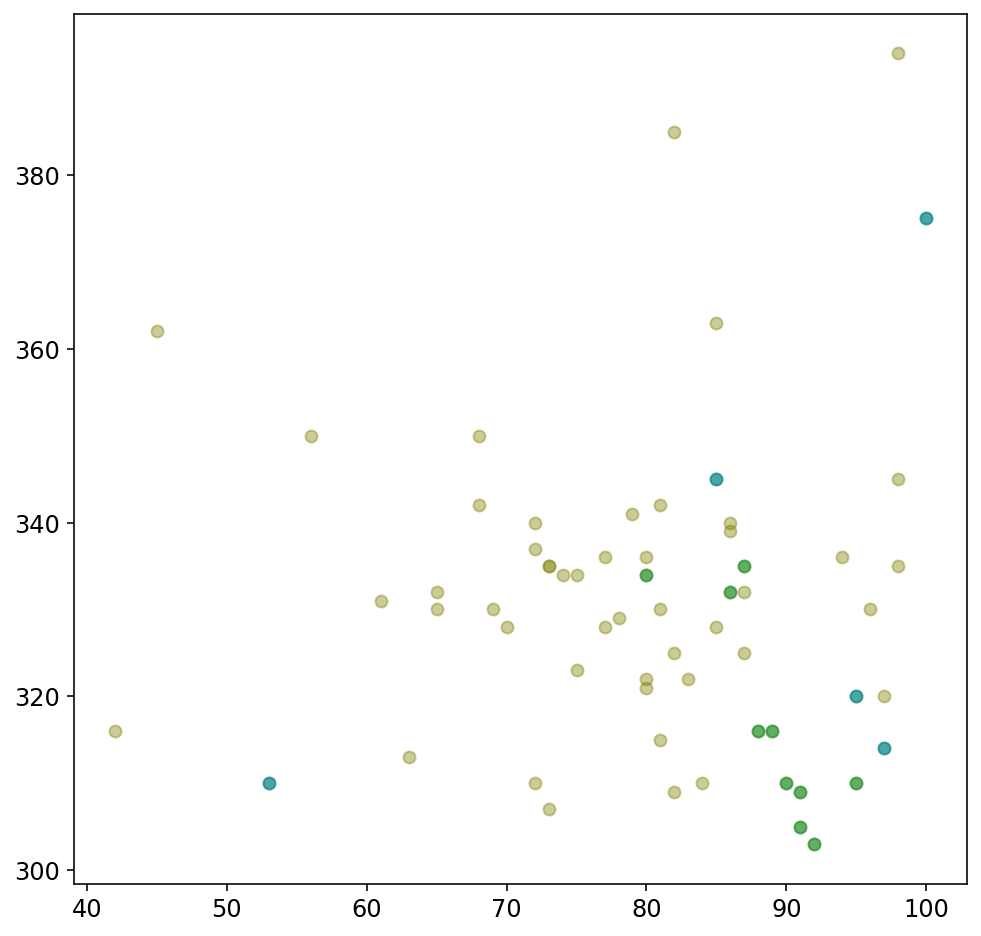

In [233]:
plt.figure(figsize=(8,8))

X_1 = PS_clusters_1.iloc[:,5] #can be changed to plot different axes 
y_1 = PS_clusters_1.iloc[:,6]

# three different graphs, colour coded by cluster, can visualise whether structurally similar compounds have similar properties

#RDK k = 2

#plt.scatter(X_1[PS_clusters_1.iloc[:,-3] ==0], y_1[PS_clusters_1.iloc[:,-3] ==0], color = "violet", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_1.iloc[:,-3] ==1], y_1[PS_clusters_1.iloc[:,-3] ==1], color = "mediumorchid", marker ="o", alpha=0.7)

#Mordred k = 3

plt.scatter(X_1[PS_clusters_1.iloc[:,-2] ==0], y_1[PS_clusters_1.iloc[:,-2] ==0], color = "forestgreen", marker ="o", alpha=0.7)
plt.scatter(X_1[PS_clusters_1.iloc[:,-2] ==1], y_1[PS_clusters_1.iloc[:,-2] ==1], color = "teal", marker ="o", alpha=0.7)
plt.scatter(X_1[PS_clusters_1.iloc[:,-2] ==2], y_1[PS_clusters_1.iloc[:,-2] ==2], color = "olive", marker ="o", alpha=0.4)

#Morgan k = 6

#plt.scatter(X_1[PS_clusters_1.iloc[:,-1] ==0], y_1[PS_clusters_1.iloc[:,-1] ==0], color = "slategrey", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_1.iloc[:,-1] ==1], y_1[PS_clusters_1.iloc[:,-1] ==1], color = "darkslateblue", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_1.iloc[:,-1] ==2], y_1[PS_clusters_1.iloc[:,-1] ==2], color = "indigo", marker ="o", alpha=0.7)#plt.scatter(X_1[PS_clusters_1.iloc[:,-2] ==0], y_1[PS_clusters_1.iloc[:,-2] ==0], color = "forestgreen", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_1.iloc[:,-1] ==3], y_1[PS_clusters_1.iloc[:,-1] ==3], color = "plum", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_1.iloc[:,-1] ==4], y_1[PS_clusters_1.iloc[:,-1] ==4], color = "fuchsia", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_1.iloc[:,-1] ==5], y_1[PS_clusters_1.iloc[:,-1] ==5], color = "crimson", marker ="o", alpha=0.7)

plt.xlim = (min(X_1), 1.05*max(X_1))
plt.ylim = (min(y_1), 1.05*max(y_1))

# Clustering based on reduced data set
Mordred Descriptors

In [183]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
pd.set_option('display.max_rows', None)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.datasets import make_moons, make_circles, load_iris, load_wine
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.tree.export import export_text
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import svm

%config InlineBackend.figure_format='retina'
photoswitch = pd.read_csv("https://raw.githubusercontent.com/FlorianSong/MResAMS_DataAnalytics/main/final_project_data/photoswitches.csv")

#load RDKIT
rdk = pd.read_csv("https://raw.githubusercontent.com/FlorianSong/MResAMS_DataAnalytics/main/final_project_data/rdkit_descriptors.csv")
#load MORDRED
mrd = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/mordred_descriptors.csv")
#load MORGAN
mrg = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/morgan_fingerprints.csv")
#load photoswitches
phts = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/photoswitches.csv")

C:\Users\Molly\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [185]:
# selecting the input (X) and output (y) variables
mdE = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/RF-Regression/mordred_descriptors_E_isomer.csv")

X_md = mdE.iloc[:, 2:-2] # mordred descriptors as input variable
y_md = mdE.iloc[:,-1] # E isomer as output variable - we want to predict

# splitting the data set into train and test sets 80:20
X_md_train, X_md_test, y_md_train, y_md_test = train_test_split(X_md, y_md, test_size=0.20, random_state=1)

# Fitting a random forest with the training data made of 1000 decision trees
random_forest = RandomForestRegressor(n_estimators=1000, random_state=1)
random_forest.fit(X_md_train, y_md_train)

# success score of the RF with the test set
print("RF success:", random_forest.score(X_md_test, y_md_test))

y_md_pred = random_forest.predict(X_md_test)
y_md_pred


# performance metrics of RF predicted y values compared to actual values in the test data set
print("Performance metrics of RF:")
print("")
print("RF success score:", random_forest.score(X_md_test, y_md_test))
print("Explained variance score:", explained_variance_score(y_md_test, y_md_pred))
print("Mean absolute error:", mean_absolute_error(y_md_test, y_md_pred))
print("R squared:", r2_score(y_md_test, y_md_pred))
print("RMSE", mean_squared_error(y_md_test, y_md_pred, squared=False))

RF success: 0.8153060054744579
Performance metrics of RF:

RF success score: 0.8153060054744579
Explained variance score: 0.8155145436112394
Mean absolute error: 13.788672362869201
R squared: 0.8153060054744579
RMSE 29.25647009158427


In [188]:
# determining feature importances of all the input variables in order of their importance and with labels

lst = list(mdE.iloc[:, 2:-2].columns.values) #list of feature names
random_forest = RandomForestRegressor(n_estimators=1000, random_state=1)
header_names = np.array(lst)
random_forest_train = random_forest.fit(X_md_train, y_md_train)
ordered = random_forest_train.feature_importances_.argsort()[::-1]
for (i, name, score) in zip(ordered, header_names[ordered], random_forest_train.feature_importances_[ordered]):
    print("{}th feature:".format(str(i).rjust(2)) , str(round(score,5)).rjust(5),  name)

571th feature: 0.15217 GATS3s
92th feature: 0.06745 ATS3se
1146th feature: 0.05565 PEOE_VSA8
263th feature: 0.04256 ATSC3s
371th feature: 0.0386 AATSC3s
1139th feature: 0.03729 PEOE_VSA1
1099th feature: 0.02988 TIC4
1039th feature: 0.02364 ECIndex
108th feature: 0.02312 ATS1are
130th feature: 0.02146 ATS5i
121th feature: 0.01707 ATS5p
1097th feature: 0.01674 TIC2
855th feature: 0.01419 Sp
1100th feature: 0.01335 TIC5
126th feature: 0.01329 ATS1i
1199th feature: 0.01159 MID_N
128th feature: 0.01092 ATS3i
851th feature: 0.00957 Sv
90th feature: 0.00952 ATS1se
99th feature: 0.0092 ATS1pe
1157th feature: 0.009 SMR_VSA6
856th feature: 0.00886 Si
1226th feature: 0.00748 apol
1168th feature: 0.00722 SlogP_VSA8
1369th feature: 0.00698 SMR
1098th feature: 0.00534 TIC3
1161th feature: 0.00528 SlogP_VSA1
771th feature: 0.00526 nBonds
840th feature: 0.0052 Xp-7dv
665th feature: 0.00467 BalabanJ
800th feature: 0.0046 Xch-5dv
499th feature: 0.00432 MATS3v
288th feature: 0.0043 ATSC1v
567th feature: 

1087th feature: 8e-05 nHBAcc
160th feature: 8e-05 AATS8s
178th feature: 8e-05 AATS8m
803th feature: 8e-05 Xc-3d
505th feature: 8e-05 MATS1se
776th feature: 8e-05 nBondsA
1070th feature: 8e-05 ETA_dAlpha_B
406th feature: 8e-05 AATSC2se
210th feature: 8e-05 AATS4are
981th feature: 8e-05 StN
214th feature: 8e-05 AATS8are
711th feature: 8e-05 SM1_Dzse
1124th feature: 8e-05 MIC5
1038th feature: 8e-05 MINdsN
133th feature: 8e-05 ATS8i
1215th feature: 8e-05 piPC1
701th feature: 8e-05 VE3_Dzv
1055th feature: 8e-05 ETA_eta_L
1415th feature: 8e-05 SRW08
691th feature: 8e-05 VR3_Dzm
308th feature: 8e-05 ATSC3pe
791th feature: 8e-05 HybRatio
748th feature: 8e-05 SpMAD_Dzp
715th feature: 8e-05 VR1_Dzse
759th feature: 8e-05 SpDiam_Dzi
521th feature: 8e-05 MATS1are
1078th feature: 8e-05 ETA_dEpsilon_C
1117th feature: 8e-05 CIC4
1402th feature: 7e-05 MWC05
413th feature: 7e-05 AATSC0pe
615th feature: 7e-05 GATS7pe
272th feature: 7e-05 ATSC3Z
849th feature: 7e-05 SZ
643th feature: 7e-05 BCUTdv-1h
1421t

1018th feature:   0.0 SsssssAs
1017th feature:   0.0 SsssdAs
1016th feature:   0.0 SsssAs
1015th feature:   0.0 SssAsH
1014th feature:   0.0 SsAsH2
920th feature:   0.0 NssPH
921th feature:   0.0 NsssP
978th feature:   0.0 SdNH
977th feature:   0.0 SssNH2
948th feature:   0.0 NssSnH2
947th feature:   0.0 NsSnH3
945th feature:   0.0 NddssSe
944th feature:   0.0 NdssSe
943th feature:   0.0 NaaSe
942th feature:   0.0 NssSe
941th feature:   0.0 NdSe
940th feature:   0.0 NsSeH
939th feature:   0.0 NsssssAs
938th feature:   0.0 NsssdAs
937th feature:   0.0 NsssAs
936th feature:   0.0 NssAsH
935th feature:   0.0 NsAsH2
934th feature:   0.0 NssssGe
933th feature:   0.0 NsssGeH
932th feature:   0.0 NssGeH2
931th feature:   0.0 NsGeH3
949th feature:   0.0 NsssSnH
950th feature:   0.0 NssssSn
952th feature:   0.0 NsPbH3
961th feature:   0.0 SssssB
975th feature:   0.0 SsNH3
922th feature:   0.0 NdsssP
923th feature:   0.0 NsssssP
969th feature:   0.0 SddC
968th feature:   0.0 SsssCH
965th feature

In [189]:
# removing features with an importance of < 0.0001 from X_md and creating X_md_new dataset
top_predictors = random_forest_train.feature_importances_.argsort()[-742:][::-1]
X_md_new = X_md.iloc[:, top_predictors]
# making new test and training dataset with X_md_new
X_md_train_new, X_md_test_new, y_md_train_new, y_md_test_new = train_test_split(X_md_new, y_md, test_size=0.20, random_state=1)
# fitting RF with the new dataset
random_forest_improved = RandomForestRegressor(n_estimators=1000, random_state=1)
random_forest_improved.fit(X_md_train_new, y_md_train_new)
# predicting new output variables of test set using X_md_test_new
y_md_pred_new = random_forest_improved.predict(X_md_test_new)
y_md_pred_new
# performance metrics of improved RF predicted y values compared to actual values in the test data set using the new dataset
print("Performance metrics of improved RF:")
print("")
print("RF success score:", random_forest_improved.score(X_md_test_new, y_md_test_new))
print("Explained variance score:", explained_variance_score(y_md_test_new, y_md_pred_new))
print("Mean absolute error:", mean_absolute_error(y_md_test_new, y_md_pred_new))
print("R squared:", r2_score(y_md_test_new, y_md_pred_new))
print("RMSE", mean_squared_error(y_md_test_new, y_md_pred_new, squared=False))
X_md_new

Performance metrics of improved RF:

RF success score: 0.8180520566636535
Explained variance score: 0.8182082879472086
Mean absolute error: 13.795813803496083
R squared: 0.8180520566636535
RMSE 29.0381613406367


GATS3s       ATS3se  PEOE_VSA8      ATSC3s   AATSC3s  PEOE_VSA1  \
0    1.089574   286.643704   0.000000   -0.555556 -0.015432   0.000000   
1    1.062647   304.243256   7.047672   -0.052930 -0.001357   0.000000   
2    1.329509   333.137144  19.310883   -2.676890 -0.062253   0.000000   
3    1.204017   377.717732  18.807967   -1.019204 -0.020800   0.000000   
4    1.368125   333.536312   7.047672   -3.584298 -0.083356   0.000000   
5    1.278333   429.151348   7.047672   -0.733951 -0.013345   0.000000   
6    1.210901   334.790236  13.114039   -0.570409 -0.013265   0.000000   
7    1.095021   379.370824  12.611123    1.104252  0.022536   0.000000   
8    1.115089   451.339124  18.435528   -0.049948 -0.000847   4.567100   
9    0.983472   495.874436  18.435528    2.318339  0.035667   4.567100   
10   1.068083   449.154676  12.741600    0.950052  0.016103   4.567100   
11   1.082773   356.785820  13.244516    1.129244  0.024026   4.567100   
12   0.924036   330.214364  19.441359    2.698110  0.062747   4.567100   
13   1.081260   328.960440   7.047672   -0.315779 -0.007344   4.567100   
14   0.962653   330.613532   7.047672    1.790702  0.041644   4.567100   
15   1.130494   320.600248  17.950597   -2.425698 -0.059163   5.733667   
16   1.081850   333.474608  12.263211   -0.558578 -0.013299   4.736863   
17   1.050930   330.052664  12.263211   -0.245226 -0.005703   0.000000   
18   1.262753   222.361156  12.132734   -2.206790 -0.081733   0.000000   
19   1.043582   285.702768  12.263211    1.173532  0.031717   0.000000   
20   1.019760   292.396620  16.735930    1.634389  0.044173   0.000000   
21   1.041897   301.582192  12.263211    3.371315  0.091117   0.000000   
22   0.796659   344.071208  12.263211   -1.556954 -0.036208   5.106527   
23   0.875434   435.556876  12.263211    1.895216  0.034458   4.736863   
24   1.362232   372.262072  17.826662  -10.407668 -0.221440   0.000000   
25   0.610114   332.265256  24.395945    4.406270  0.107470   0.000000   
26   1.120496   365.295160   7.047672  -12.167631 -0.282968   0.000000   
27   1.049598   460.910196   7.047672   -4.783333 -0.086970   0.000000   
28   1.274000   449.068296   7.047672   -0.274095 -0.004984   0.000000   
29   1.026596   525.973676   7.047672    4.039089  0.062140   9.473726   
30   0.964942   383.923996   0.000000    3.480710  0.074058   0.000000   
31   0.992950   383.923996   0.000000   -1.185957 -0.025233   0.000000   
32   1.089684   415.682844   0.000000  -33.118056 -0.704639   0.000000   
33   1.331988   445.746460  24.265468 -137.278549 -2.920820   0.000000   
34   1.092486   483.739932  12.132734  -60.426698 -1.285674   0.000000   
35   1.004793   521.733404   0.000000  -30.562500 -0.650266   0.000000   
36   0.943260   533.778104   0.000000   -2.129017 -0.032754   4.736863   
37   1.013483   715.391060   0.000000  -36.279164 -0.437098   9.473726   
38   1.041747   565.536952   0.000000  -33.435823 -0.514397   4.736863   
39   0.932461   683.632212   0.000000   -8.226253 -0.099111   9.473726   
40   0.965513   533.778104   0.000000   -7.240129 -0.111387   4.736863   
41   1.474169   695.300468  37.354981  -40.890989 -0.481070  20.107303   
42   1.480416   792.122796  49.487715  -42.237578 -0.444606  29.581029   
43   0.942209   376.726456  12.263211    3.092593  0.064429   4.736863   
44   1.082826   328.315292   6.196844    0.540223  0.012563   0.000000   
45   1.008163   372.757896   6.196844    1.097798  0.022404   0.000000   
46   0.931580   500.171800   6.196844    2.168728  0.032369   0.000000   
47   1.101943   330.413000   9.767026    0.221994  0.005163   0.000000   
48   0.979604   450.678296  20.292188    1.048676  0.017774   4.899910   
49   0.838653   795.717656  12.741600    3.614883  0.034758   0.000000   
50   0.948808  1759.802618   4.895483   16.754229  0.076503  33.158041   
51   1.006645   397.572680   0.000000    3.430194  0.070004   0.000000   
52   1.181408   396.725064   6.066367  -13.197378 -0.269334   0.000000   
53   1.1486

For n_clusters = 2 The average silhouette_score is : 0.454836
For n_clusters = 3 The average silhouette_score is : 0.48113796
For n_clusters = 4 The average silhouette_score is : 0.47346526
For n_clusters = 5 The average silhouette_score is : 0.4657871
For n_clusters = 6 The average silhouette_score is : 0.47279564
For n_clusters = 7 The average silhouette_score is : 0.4461834
For n_clusters = 8 The average silhouette_score is : 0.44351536
For n_clusters = 9 The average silhouette_score is : 0.44994572
For n_clusters = 10 The average silhouette_score is : 0.43010485


Text(0, 0.5, 't-SNE 2')

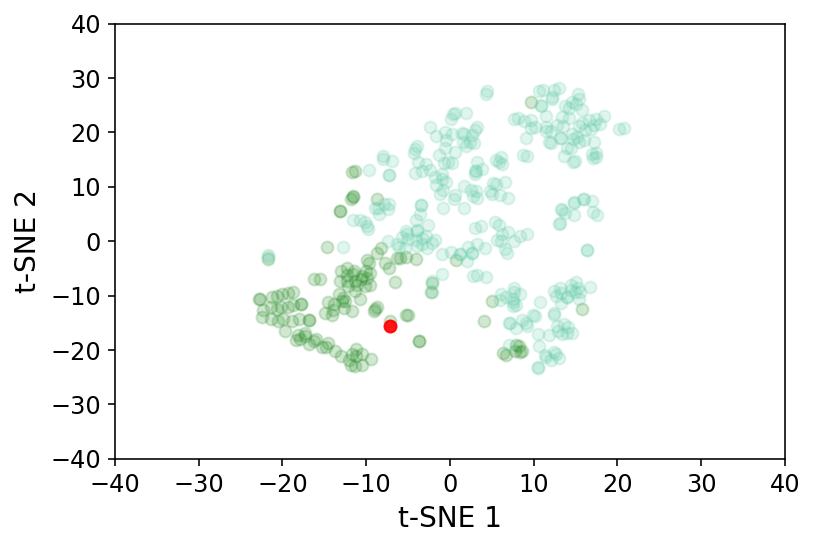

In [190]:
X_mrd = StandardScaler().fit_transform(X_md_new)
y_mrd = KMeans(3).fit_predict(X_md_new)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_mrd, y_mrd)

tsne = TSNE().fit_transform(X_mrd) #default is two dimensions

ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(tsne)
    inertias.append(model.inertia_)
    
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(tsne[:])
    silhouette_avg = silhouette_score(tsne[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
#f = plt.figure()
plt.scatter(tsne[:,0][y_mrd==0], tsne[:,1][y_mrd==0], color = "forestgreen", marker ="o", alpha=0.2)
plt.scatter(tsne[:,0][y_mrd==1], tsne[:,1][y_mrd==1], color ="mediumaquamarine", marker ="o", alpha=0.2)
plt.scatter(tsne[:,0][y_mrd==2], tsne[:,1][y_mrd==2], color ="red", marker ="o", alpha=0.9)
plt.axis([-40, 40, -40, 40])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
#f.savefig("HDataMRDclusts.png", bbox_inches='tight')

In [191]:
X_md_new_2 = X_md_new.copy()
X_md_new_2['Mordred Clusters'] = y_mrd
X_md_new_2 #index 50 is in its own cluster, only 391 molecules as only wavelength data for these

GATS3s       ATS3se  PEOE_VSA8      ATSC3s   AATSC3s  PEOE_VSA1  \
0    1.089574   286.643704   0.000000   -0.555556 -0.015432   0.000000   
1    1.062647   304.243256   7.047672   -0.052930 -0.001357   0.000000   
2    1.329509   333.137144  19.310883   -2.676890 -0.062253   0.000000   
3    1.204017   377.717732  18.807967   -1.019204 -0.020800   0.000000   
4    1.368125   333.536312   7.047672   -3.584298 -0.083356   0.000000   
5    1.278333   429.151348   7.047672   -0.733951 -0.013345   0.000000   
6    1.210901   334.790236  13.114039   -0.570409 -0.013265   0.000000   
7    1.095021   379.370824  12.611123    1.104252  0.022536   0.000000   
8    1.115089   451.339124  18.435528   -0.049948 -0.000847   4.567100   
9    0.983472   495.874436  18.435528    2.318339  0.035667   4.567100   
10   1.068083   449.154676  12.741600    0.950052  0.016103   4.567100   
11   1.082773   356.785820  13.244516    1.129244  0.024026   4.567100   
12   0.924036   330.214364  19.441359    2.698110  0.062747   4.567100   
13   1.081260   328.960440   7.047672   -0.315779 -0.007344   4.567100   
14   0.962653   330.613532   7.047672    1.790702  0.041644   4.567100   
15   1.130494   320.600248  17.950597   -2.425698 -0.059163   5.733667   
16   1.081850   333.474608  12.263211   -0.558578 -0.013299   4.736863   
17   1.050930   330.052664  12.263211   -0.245226 -0.005703   0.000000   
18   1.262753   222.361156  12.132734   -2.206790 -0.081733   0.000000   
19   1.043582   285.702768  12.263211    1.173532  0.031717   0.000000   
20   1.019760   292.396620  16.735930    1.634389  0.044173   0.000000   
21   1.041897   301.582192  12.263211    3.371315  0.091117   0.000000   
22   0.796659   344.071208  12.263211   -1.556954 -0.036208   5.106527   
23   0.875434   435.556876  12.263211    1.895216  0.034458   4.736863   
24   1.362232   372.262072  17.826662  -10.407668 -0.221440   0.000000   
25   0.610114   332.265256  24.395945    4.406270  0.107470   0.000000   
26   1.120496   365.295160   7.047672  -12.167631 -0.282968   0.000000   
27   1.049598   460.910196   7.047672   -4.783333 -0.086970   0.000000   
28   1.274000   449.068296   7.047672   -0.274095 -0.004984   0.000000   
29   1.026596   525.973676   7.047672    4.039089  0.062140   9.473726   
30   0.964942   383.923996   0.000000    3.480710  0.074058   0.000000   
31   0.992950   383.923996   0.000000   -1.185957 -0.025233   0.000000   
32   1.089684   415.682844   0.000000  -33.118056 -0.704639   0.000000   
33   1.331988   445.746460  24.265468 -137.278549 -2.920820   0.000000   
34   1.092486   483.739932  12.132734  -60.426698 -1.285674   0.000000   
35   1.004793   521.733404   0.000000  -30.562500 -0.650266   0.000000   
36   0.943260   533.778104   0.000000   -2.129017 -0.032754   4.736863   
37   1.013483   715.391060   0.000000  -36.279164 -0.437098   9.473726   
38   1.041747   565.536952   0.000000  -33.435823 -0.514397   4.736863   
39   0.932461   683.632212   0.000000   -8.226253 -0.099111   9.473726   
40   0.965513   533.778104   0.000000   -7.240129 -0.111387   4.736863   
41   1.474169   695.300468  37.354981  -40.890989 -0.481070  20.107303   
42   1.480416   792.122796  49.487715  -42.237578 -0.444606  29.581029   
43   0.942209   376.726456  12.263211    3.092593  0.064429   4.736863   
44   1.082826   328.315292   6.196844    0.540223  0.012563   0.000000   
45   1.008163   372.757896   6.196844    1.097798  0.022404   0.000000   
46   0.931580   500.171800   6.196844    2.168728  0.032369   0.000000   
47   1.101943   330.413000   9.767026    0.221994  0.005163   0.000000   
48   0.979604   450.678296  20.292188    1.048676  0.017774   4.899910   
49   0.838653   795.717656  12.741600    3.614883  0.034758   0.000000   
50   0.948808  1759.802618   4.895483   16.754229  0.076503  33.158041   
51   1.006645   397.572680   0.000000    3.430194  0.070004   0.000000   
52   1.181408   396.725064   6.066367  -13.197378 -0.269334   0.000000   
53   1.1486

RDKit

In [192]:
# selecting the input (X) and output (y) variables
rdE = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/RF-Regression/rdkit_descriptors_E_isomer.csv")

X_rd = rdE.iloc[:, 2:-2] # rdkit descriptors as input variable
y_rd = rdE.iloc[:,-1] # E isomer as output variable
# splitting the data set into train and test sets 80:20
X_rd_train, X_rd_test, y_rd_train, y_rd_test = train_test_split(X_rd, y_rd, test_size=0.20, random_state=1)

# Fitting a random forest with the training data made of 1000 decision trees
random_forest_rd = RandomForestRegressor(n_estimators=1000, random_state=1)
random_forest_rd.fit(X_rd_train, y_rd_train)

# success score of the RF with the test set
print("RF success:", random_forest_rd.score(X_rd_test, y_rd_test))

# predicting output variables of test set using X_rd_test
y_rd_pred = random_forest_rd.predict(X_rd_test)
#performance metrics of RF predicted y values compared to actual values in the test data set
print("Performance metrics of RF:")
print("")
print("RF success score:", random_forest_rd.score(X_rd_test, y_rd_test))
print("Explained variance score:", explained_variance_score(y_rd_test, y_rd_pred))
print("Mean absolute error:", mean_absolute_error(y_rd_test, y_rd_pred))
print("R squared:", r2_score(y_rd_test, y_rd_pred))
print("RMSE", mean_squared_error(y_rd_test, y_rd_pred, squared=False))

# determining feature importances of all the input variables in order of their importance and with labels

lst_rd = list(rdE.iloc[:, 2:-2].columns.values) #list of feature names
random_forest_rd = RandomForestRegressor(n_estimators=1000, random_state=1)
header_names_rd = np.array(lst_rd)
random_forest_rd_train = random_forest_rd.fit(X_rd_train, y_rd_train)
ordered_rd = random_forest_rd_train.feature_importances_.argsort()[::-1]
for (i, name, score) in zip(ordered_rd, header_names_rd[ordered_rd], random_forest_rd_train.feature_importances_[ordered_rd]):
    print("{}th feature:".format(str(i).rjust(2)) , str(round(score,5)).rjust(5),  name)

RF success: 0.7936775912572477
Performance metrics of RF:

RF success score: 0.7936775912572477
Explained variance score: 0.793799423169075
Mean absolute error: 15.024261603375528
R squared: 0.7936775912572477
RMSE 30.92208276078525
31th feature: 0.13045 Chi1n
57th feature: 0.12651 PEOE_VSA8
24th feature: 0.06534 BCUT2D_MRLOW
122th feature: 0.06277 MolMR
45th feature: 0.06274 PEOE_VSA1
46th feature: 0.03136 PEOE_VSA10
25th feature: 0.02636 BalabanJ
138th feature: 0.02607 fr_NH0
65th feature: 0.02442 SMR_VSA6
101th feature: 0.02434 VSA_EState8
79th feature: 0.02277 SlogP_VSA8
152th feature: 0.02144 fr_aniline
39th feature: 0.01595 HallKierAlpha
33th feature: 0.01306 Chi2n
37th feature: 0.01284 Chi4n
28th feature: 0.01208 Chi0n
87th feature: 0.01159 EState_VSA4
183th feature: 0.01145 fr_nitro_arom_nonortho
35th feature: 0.01106 Chi3n
18th feature: 0.0105 BCUT2D_MWLOW
19th feature: 0.01008 BCUT2D_CHGHI
97th feature: 0.00987 VSA_EState4
96th feature: 0.00919 VSA_EState3
42th feature: 0.008

In [193]:
top_rd_predictors = random_forest_rd_train.feature_importances_.argsort()[-139:][::-1]
X_rd_new = X_rd.iloc[:, top_rd_predictors]
# making new test and training dataset with X_rd_new
X_rd_train_new, X_rd_test_new, y_rd_train_new, y_rd_test_new = train_test_split(X_rd_new, y_rd, test_size=0.20, random_state=1)
# fitting RF with the new dataset
random_forest_rd_improved = RandomForestRegressor(n_estimators=1000, random_state=1)
random_forest_rd_improved.fit(X_rd_train_new, y_rd_train_new)
# predicting new output variables of test set using X_rd_test_new
y_rd_pred_new = random_forest_rd_improved.predict(X_rd_test_new)
y_rd_pred_new
print("Performance metrics of improved RF:")
print("")
print("RF success score:", random_forest_rd_improved.score(X_rd_test_new, y_rd_test_new))
print("Explained variance score:", explained_variance_score(y_rd_test_new, y_rd_pred_new))
print("Mean absolute error:", mean_absolute_error(y_rd_test_new, y_rd_pred_new))
print("R squared:", r2_score(y_rd_test_new, y_rd_pred_new))
print("RMSE", mean_squared_error(y_rd_test_new, y_rd_pred_new, squared=False))

Performance metrics of improved RF:

RF success score: 0.7976235534014412
Explained variance score: 0.797700310672537
Mean absolute error: 14.953239451476794
R squared: 0.7976235534014412
RMSE 30.62495939562273


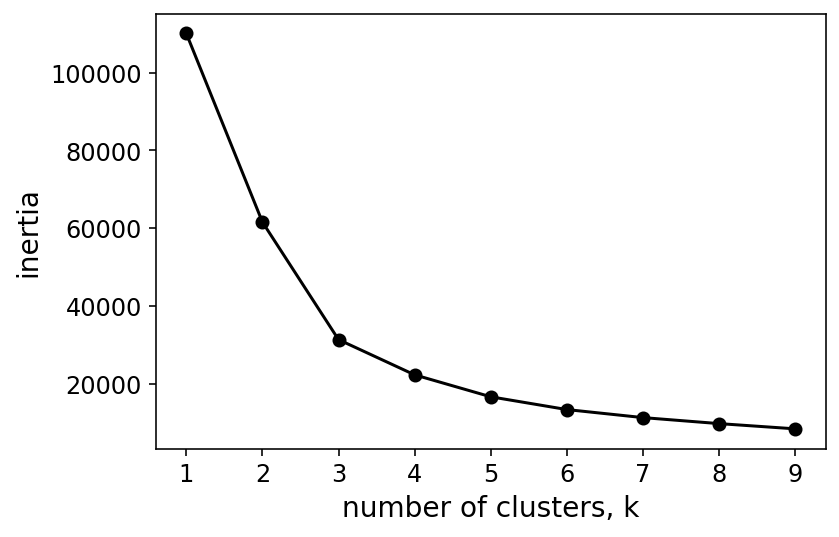

For n_clusters = 2 The average silhouette_score is : 0.4044335
For n_clusters = 3 The average silhouette_score is : 0.49492568
For n_clusters = 4 The average silhouette_score is : 0.46654323
For n_clusters = 5 The average silhouette_score is : 0.46525845
For n_clusters = 6 The average silhouette_score is : 0.46027425
For n_clusters = 7 The average silhouette_score is : 0.45079973
For n_clusters = 8 The average silhouette_score is : 0.44011548
For n_clusters = 9 The average silhouette_score is : 0.43057033
For n_clusters = 10 The average silhouette_score is : 0.43003982


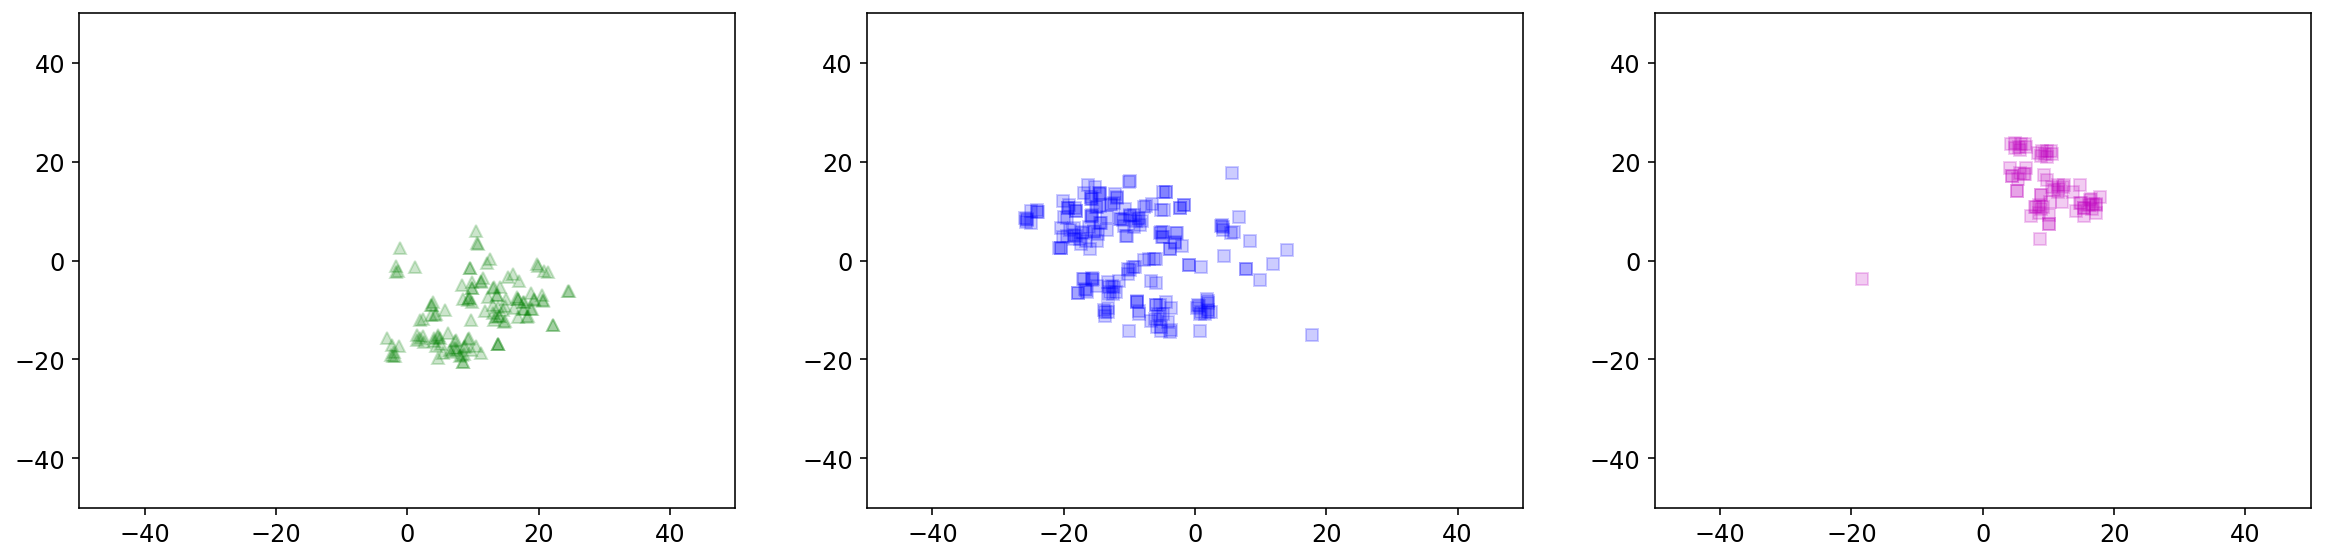

In [259]:
X_rdk = StandardScaler().fit_transform(X_rd_new)
y_rdk_3 = KMeans(3).fit_predict(X_rdk)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_rdk, y_rdk_3)

tsne = TSNE().fit_transform(X_rdk) #default is two dimensions

ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(tsne)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 3

plt.figure(figsize=(20,10))
plt.subplot(231)
plt.plot(tsne[:,0][y_rdk_3==0], tsne[:,1][y_rdk_3==0], "g^", alpha=0.2)
plt.axis([-50, 50, -50, 50])

plt.subplot(232)
plt.plot(tsne[:,0][y_rdk_3==1], tsne[:,1][y_rdk_3==1], "bs", alpha=0.2)
plt.axis([-50, 50, -50, 50])

plt.subplot(233)
#plt.plot(tsne[:,0][y_rdk==0], tsne[:,1][y_rdk==0], "g^", alpha=0.2)
plt.plot(tsne[:,0][y_rdk_3==2], tsne[:,1][y_rdk_3==2], "ms", alpha=0.2)
plt.axis([-50, 50, -50, 50])


range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(tsne[:])
    silhouette_avg = silhouette_score(tsne[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

Text(0, 0.5, 't-SNE 2')

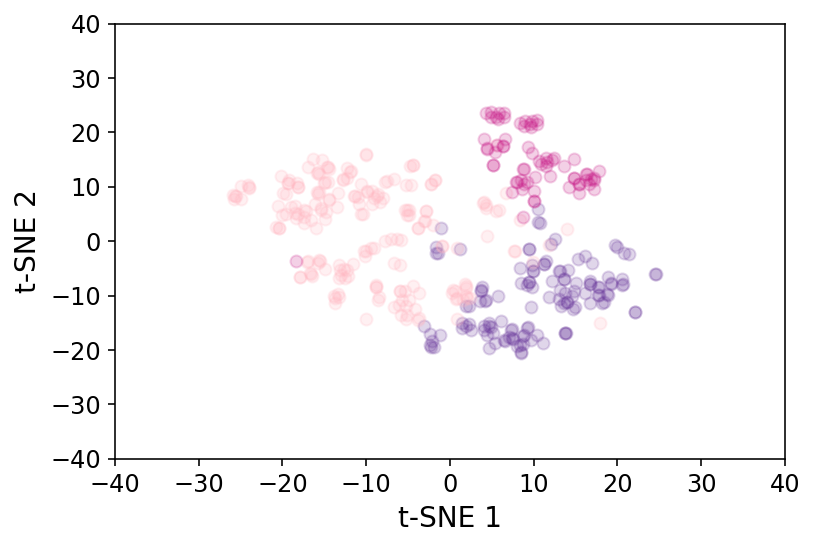

In [260]:
#f = plt.figure()
plt.scatter(tsne[:,0][y_rdk_3==0], tsne[:,1][y_rdk_3==0], color = "rebeccapurple", marker ="o", alpha=0.2)
plt.scatter(tsne[:,0][y_rdk_3==1], tsne[:,1][y_rdk_3==1], color ="lightpink", marker ="o", alpha=0.2)
plt.scatter(tsne[:,0][y_rdk_3==2], tsne[:,1][y_rdk_3==2], color ="mediumvioletred", marker ="o", alpha=0.2)
plt.axis([-40, 40, -40, 40])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
#f.savefig("HDataRDKclusts-tsne4.png", bbox_inches='tight')

Morgan Fingerprints

In [196]:
# selecting the input (X) and output (y) variables
mfE = pd.read_csv("https://raw.githubusercontent.com/HarrietJudah/Data-analytics-group-project/main/RF-Regression/morgan_fingerprints_E_isomer.csv")

X_mf = mfE.iloc[:, 2:-2] # morgan fingerprints as input variable
y_mf = mfE.iloc[:,-1] # E isomer as output variable
# splitting the data set into train and test sets 80:20
X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(X_mf, y_mf, test_size=0.20, random_state=1)

# Fitting a random forest with the training data made of 1000 decision trees
random_forest_mf = RandomForestRegressor(n_estimators=1000, random_state=1)
random_forest_mf.fit(X_mf_train, y_mf_train)

# success score of the RF with the test set
print("RF success:", random_forest_mf.score(X_mf_test, y_mf_test))
# predicting output variables of test set using X_mf_test
y_mf_pred = random_forest_mf.predict(X_mf_test)
y_mf_pred
# performance metrics of RF predicted y values compared to actual values in the test data set
print("Performance metrics of RF:")
print("")
print("RF success score:", random_forest_mf.score(X_mf_test, y_mf_test))
print("Explained variance score:", explained_variance_score(y_mf_test, y_mf_pred))
print("Mean absolute error:", mean_absolute_error(y_mf_test, y_mf_pred))
print("R squared:", r2_score(y_mf_test, y_mf_pred))
print("RMSE", mean_squared_error(y_mf_test, y_mf_pred, squared=False))
# determining feature importances of all the input variables in order of their importance and with labels

lst_mf = list(mfE.iloc[:, 2:-2].columns.values) #list of feature names
random_forest_mf = RandomForestRegressor(n_estimators=1000, random_state=1)
header_names_mf = np.array(lst_mf)
random_forest_mf_train = random_forest_mf.fit(X_mf_train, y_mf_train)
ordered_mf = random_forest_mf_train.feature_importances_.argsort()[::-1]
for (i, name, score) in zip(ordered_mf, header_names_mf[ordered_mf], random_forest_mf_train.feature_importances_[ordered_mf]):
    print("{}th feature:".format(str(i).rjust(2)) , str(round(score,5)).rjust(5),  name)


RF success: 0.8769946678243178
Performance metrics of RF:

RF success score: 0.8769946678243178
Explained variance score: 0.877256447245377
Mean absolute error: 14.513858740204935
R squared: 0.8769946678243178
RMSE 23.875776650306218
180th feature: 0.26335 180
881th feature: 0.07841 881
1357th feature: 0.05122 1357
1384th feature: 0.04411 1384
1951th feature: 0.03075 1951
843th feature: 0.02821 843
618th feature: 0.01675 618
1573th feature: 0.0159 1573
875th feature: 0.01297 875
1096th feature: 0.01283 1096
1457th feature: 0.01187 1457
960th feature: 0.01165 960
80th feature: 0.01105 80
1274th feature: 0.01052 1274
1809th feature: 0.01045 1809
1504th feature: 0.01016 1504
1120th feature: 0.01015 1120
1171th feature: 0.01005 1171
202th feature: 0.00851 202
1687th feature: 0.00794 1687
92th feature: 0.0078 92
1416th feature: 0.00706 1416
1136th feature: 0.0068 1136
42th feature: 0.00677 42
407th feature: 0.00675 407
1379th feature: 0.00654 1379
1047th feature: 0.00617 1047
737th feature:

483th feature: 2e-05 483
1071th feature: 2e-05 1071
1856th feature: 2e-05 1856
1724th feature: 2e-05 1724
535th feature: 2e-05 535
912th feature: 2e-05 912
864th feature: 2e-05 864
750th feature: 2e-05 750
1860th feature: 2e-05 1860
2017th feature: 2e-05 2017
125th feature: 2e-05 125
739th feature: 2e-05 739
110th feature: 2e-05 110
147th feature: 2e-05 147
229th feature: 2e-05 229
1991th feature: 2e-05 1991
1802th feature: 2e-05 1802
134th feature: 2e-05 134
1758th feature: 2e-05 1758
659th feature: 2e-05 659
1359th feature: 2e-05 1359
544th feature: 2e-05 544
285th feature: 2e-05 285
1318th feature: 2e-05 1318
1299th feature: 2e-05 1299
1112th feature: 2e-05 1112
1456th feature: 2e-05 1456
940th feature: 1e-05 940
1811th feature: 1e-05 1811
257th feature: 1e-05 257
1888th feature: 1e-05 1888
46th feature: 1e-05 46
146th feature: 1e-05 146
292th feature: 1e-05 292
1165th feature: 1e-05 1165
591th feature: 1e-05 591
309th feature: 1e-05 309
187th feature: 1e-05 187
1487th feature: 1e-0

1981th feature:   0.0 1981
63th feature:   0.0 63
61th feature:   0.0 61
59th feature:   0.0 59
1988th feature:   0.0 1988
1990th feature:   0.0 1990
55th feature:   0.0 55
51th feature:   0.0 51
2015th feature:   0.0 2015
1994th feature:   0.0 1994
1995th feature:   0.0 1995
1997th feature:   0.0 1997
2002th feature:   0.0 2002
2003th feature:   0.0 2003
2005th feature:   0.0 2005
41th feature:   0.0 41
38th feature:   0.0 38
37th feature:   0.0 37
36th feature:   0.0 36
2010th feature:   0.0 2010
143th feature:   0.0 143
1906th feature:   0.0 1906
1904th feature:   0.0 1904
148th feature:   0.0 148
1786th feature:   0.0 1786
251th feature:   0.0 251
250th feature:   0.0 250
1787th feature:   0.0 1787
1789th feature:   0.0 1789
247th feature:   0.0 247
246th feature:   0.0 246
1790th feature:   0.0 1790
1792th feature:   0.0 1792
243th feature:   0.0 243
242th feature:   0.0 242
240th feature:   0.0 240
1795th feature:   0.0 1795
236th feature:   0.0 236
1575th feature:   0.0 1575
180

In [198]:
# removing features with an importance of < 0.0001 from X_mf and creating X_mf_new dataset
top_mf_predictors = random_forest_mf_train.feature_importances_.argsort()[-393:][::-1]
X_mf_new = X_mf.iloc[:, top_mf_predictors]
# making new test and training dataset with X_mf_new
X_mf_train_new, X_mf_test_new, y_mf_train_new, y_mf_test_new = train_test_split(X_mf_new, y_mf, test_size=0.20, random_state=1)
# fitting RF with the new dataset
random_forest_mf_improved = RandomForestRegressor(n_estimators=1000, random_state=1)
random_forest_mf_improved.fit(X_mf_train_new, y_mf_train_new)
# predicting new output variables of test set using X_mf_test_new
y_mf_pred_new = random_forest_mf_improved.predict(X_mf_test_new)
y_mf_pred_new
# performance metrics of improved RF predicted y values compared to actual values in the test data set using the new dataset
print("Performance metrics of improved RF:")
print("")
print("RF success score:", random_forest_mf_improved.score(X_mf_test_new, y_mf_test_new))
print("Explained variance score:", explained_variance_score(y_mf_test_new, y_mf_pred_new))
print("Mean absolute error:", mean_absolute_error(y_mf_test_new, y_mf_pred_new))
print("R squared:", r2_score(y_mf_test_new, y_mf_pred_new))
print("RMSE", mean_squared_error(y_mf_test_new, y_mf_pred_new, squared=False))

Performance metrics of improved RF:

RF success score: 0.8767471496892426
Explained variance score: 0.8770509345130493
Mean absolute error: 14.661175467148881
R squared: 0.8767471496892426
RMSE 23.899786657200814


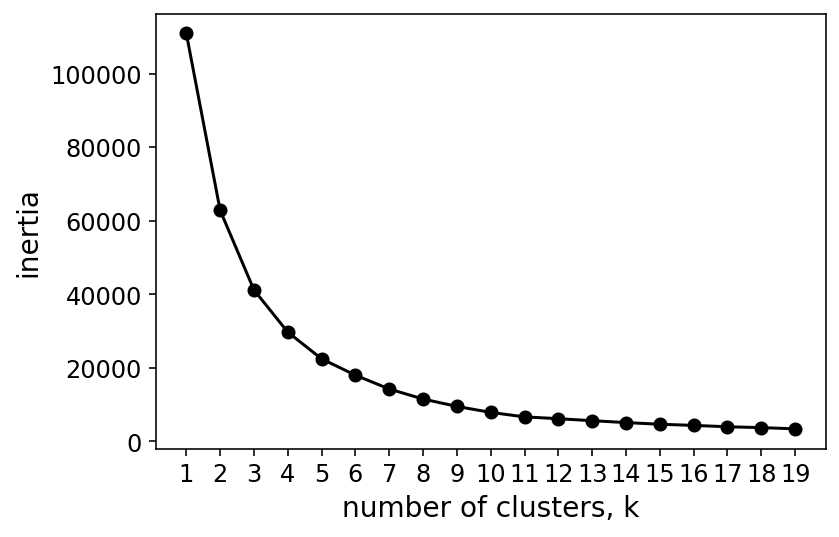

For n_clusters = 2 The average silhouette_score is : 0.38821536
For n_clusters = 3 The average silhouette_score is : 0.41285744
For n_clusters = 4 The average silhouette_score is : 0.40895987
For n_clusters = 5 The average silhouette_score is : 0.4322344
For n_clusters = 6 The average silhouette_score is : 0.45112735
For n_clusters = 7 The average silhouette_score is : 0.46772495
For n_clusters = 8 The average silhouette_score is : 0.4864876
For n_clusters = 9 The average silhouette_score is : 0.4835682
For n_clusters = 10 The average silhouette_score is : 0.50210977
For n_clusters = 11 The average silhouette_score is : 0.5007378
For n_clusters = 12 The average silhouette_score is : 0.49456358
For n_clusters = 13 The average silhouette_score is : 0.48992383
For n_clusters = 14 The average silhouette_score is : 0.4822952
For n_clusters = 15 The average silhouette_score is : 0.49114025
For n_clusters = 16 The average silhouette_score is : 0.49490747
For n_clusters = 17 The average silhou

In [264]:
X_mrg = StandardScaler().fit_transform(X_mf_new)
y_mrg_2 = KMeans(5).fit_predict(X_mrg)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_mrg, y_mrg_2)

tsne = TSNE().fit_transform(X_mrg) #default is two dimensions

ks = range(1, 20)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(tsne)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 3

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(tsne[:])
    silhouette_avg = silhouette_score(tsne[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

(-30.0, 30.0, -30.0, 30.0)

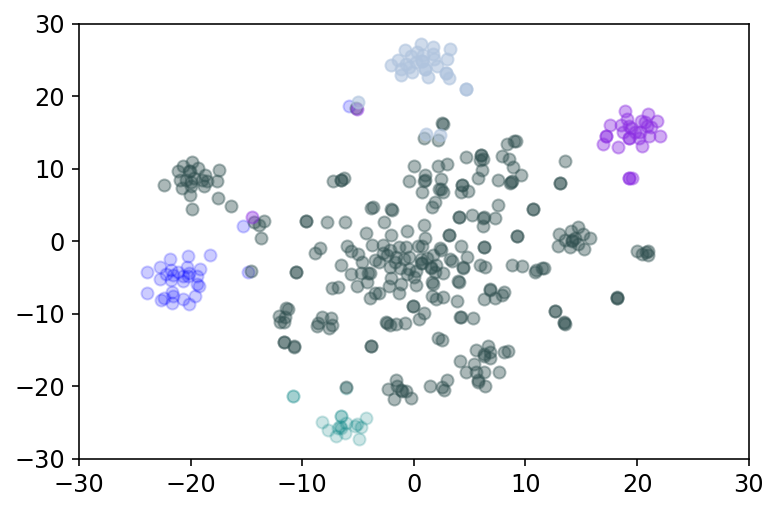

In [265]:
#f = plt.figure()

plt.scatter(tsne[:,0][y_mrg_2==0], tsne[:,1][y_mrg_2==0], color="blue", marker ="o", alpha=0.2)
plt.scatter(tsne[:,0][y_mrg_2==1], tsne[:,1][y_mrg_2==1], color="teal",marker ="o", alpha=0.2)
plt.scatter(tsne[:,0][y_mrg_2==2], tsne[:,1][y_mrg_2==2],color= "darkslategrey",marker ="o", alpha=0.4)
plt.scatter(tsne[:,0][y_mrg_2==3], tsne[:,1][y_mrg_2==3], color="blueviolet", marker ="o", alpha=0.4)
plt.scatter(tsne[:,0][y_mrg_2==4], tsne[:,1][y_mrg_2==4], color="lightsteelblue",marker ="o", alpha=0.6)
plt.axis([-30,30,-30,30])

#f.savefig("HDataMRgclusts-tsne.png", bbox_inches='tight')

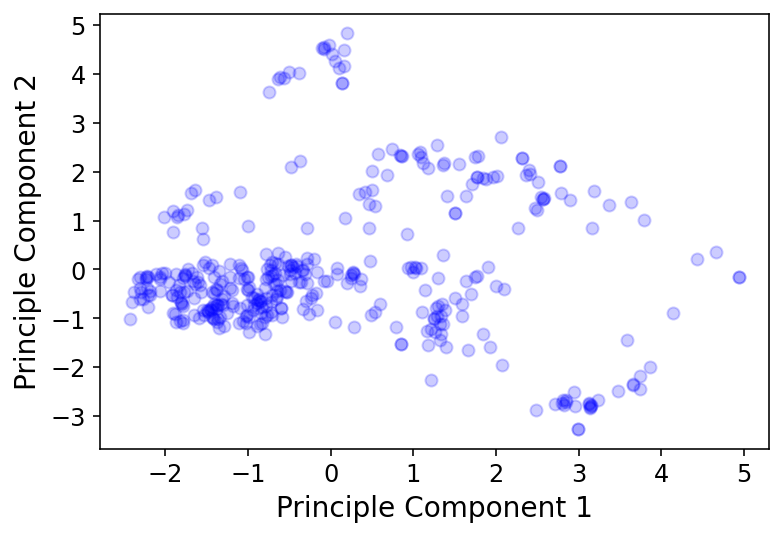

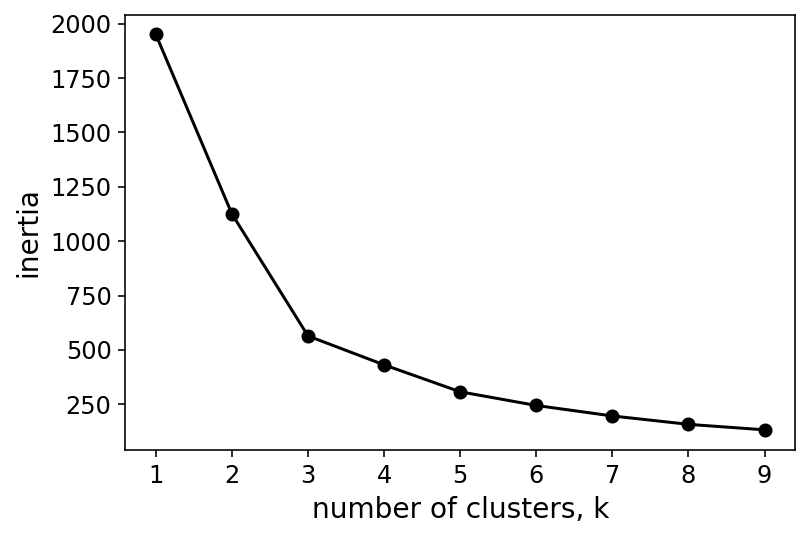

For n_clusters = 2 The average silhouette_score is : 0.48881566345452665
For n_clusters = 3 The average silhouette_score is : 0.5757006465827142
For n_clusters = 4 The average silhouette_score is : 0.5871923026153398
For n_clusters = 5 The average silhouette_score is : 0.5456208813094443
For n_clusters = 6 The average silhouette_score is : 0.4438070676118748
For n_clusters = 7 The average silhouette_score is : 0.44602883199181226
For n_clusters = 8 The average silhouette_score is : 0.477494032919032
For n_clusters = 9 The average silhouette_score is : 0.48171024648150274
For n_clusters = 10 The average silhouette_score is : 0.46511786188850673


In [204]:
#not scaled///
pca_mrg2 = PCA(2)  
twoD_mrg_2 = pca_mrg2.fit_transform(X_mf_new)
#f = plt.figure()
plt.scatter(twoD_mrg_2[:,0], twoD_mrg_2[:,1], alpha=.2, color='blue')
#plt.scatter(-1.1987,-0.131, alpha=.6, color='red')
#plt.scatter(-1.0550009 , -0.10984453, alpha=.6, color='black')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()
#f.savefig("MORGANPCA1-2HJdata.png", bbox_inches='tight')
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(twoD_mrg_2)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() #k = 5

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(twoD_mrg_2[:])
    silhouette_avg = silhouette_score(twoD_mrg_2[:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

Text(0, 0.5, 'Principle Compenent 2')

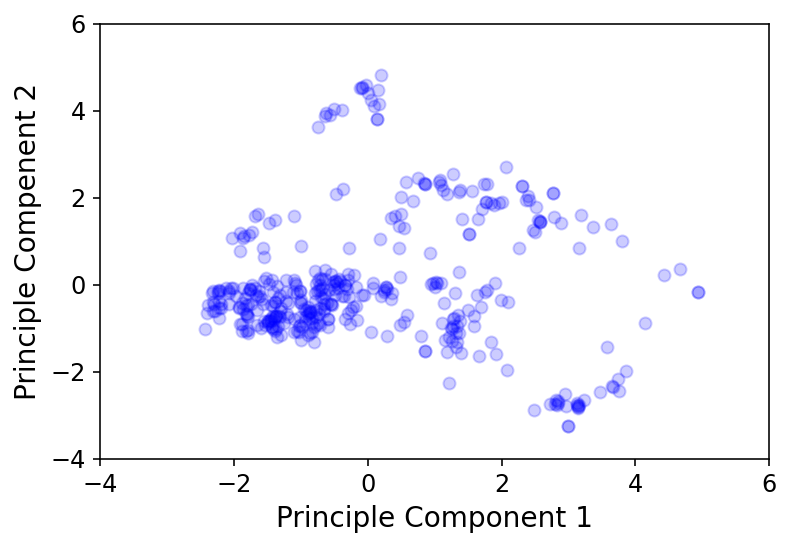

In [266]:
X_mrg_3 = StandardScaler().fit_transform(twoD_mrg_2)
y_mrg_3 = KMeans(3).fit_predict(X_mrg_3)
rndfor = RandomForestClassifier(n_estimators=500)
rndfor.fit(X_mrg_3, y_mrg_3)

#tsne = TSNE().fit_transform(X_rdk) #default is two dimensions
#f = plt.figure()
plt.scatter(twoD_mrg_2[:,0], twoD_mrg_2[:,1], color = "blue", alpha = 0.2)
plt.axis([-4,6,-4,6])
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Compenent 2')
#f.savefig("MRD PCA 4 hj dt.png", bbox_inches='tight')

(-4.0, 6.0, -4.0, 6.0)

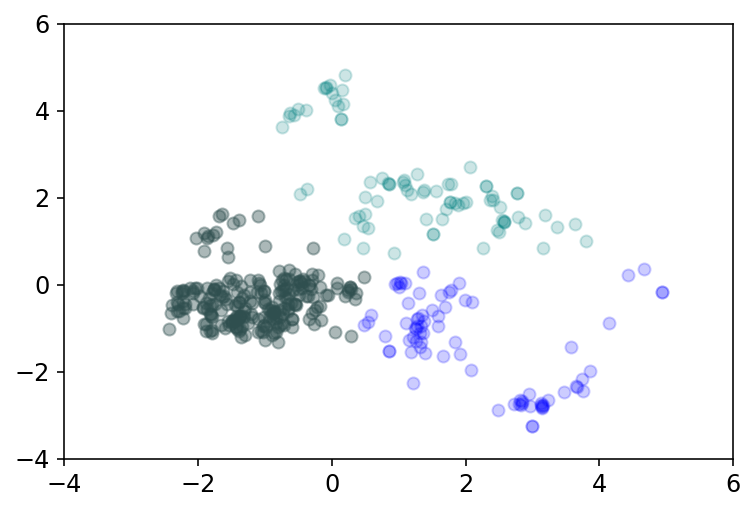

In [207]:
#f = plt.figure()

plt.scatter(twoD_mrg_2[:,0][y_mrg_3==0], twoD_mrg_2[:,1][y_mrg_3==0], color="blue", marker ="o", alpha=0.2)
plt.scatter(twoD_mrg_2[:,0][y_mrg_3==1], twoD_mrg_2[:,1][y_mrg_3==1], color="teal",marker ="o", alpha=0.2)
plt.scatter(twoD_mrg_2[:,0][y_mrg_3==2], twoD_mrg_2[:,1][y_mrg_3==2],color= "darkslategrey",marker ="o", alpha=0.4)
#plt.scatter(tsne[:,0][y_mrd==3], tsne[:,1][y_mrd==3], color="blueviolet", marker ="o", alpha=0.4)
#plt.scatter(tsne[:,0][y_mrd==4], tsne[:,1][y_mrd==4], color="lightsteelblue",marker ="o", alpha=0.6)
plt.axis([-4,6,-4,6])

#f.savefig("HDataMRgclusts-pca.png", bbox_inches='tight')

In [255]:
PS_clusters_2 = phts.copy() #remove anything where column 4 doesn't have a value
#PS_clusters_2.iloc[:,4].sort_values() # indices 41-52, 158
#PS_nan_removed = PS_clusters_2.drop([41,42,43,44,45,46,47,48,49,50,51,52,158])
PS_nan_removed = PS_clusters_2.dropna(subset=['E isomer pi-pi* wavelength in nm'])
PS_nan_removed

rate of thermal isomerisation from Z-E in s-1  \
0                                     2.100000e-07   
1                                     3.800000e-07   
2                                     1.100000e-07   
3                                     1.500000e-06   
4                                     7.600000e-09   
5                                     7.700000e-07   
6                                     7.400000e-07   
7                                     1.600000e-05   
8                                     2.200000e-06   
9                                     7.600000e-04   
10                                    3.300000e-02   
11                                    6.500000e-05   
12                                    2.200000e-05   
13                                    3.300000e-06   
14                                    1.200000e-06   
15                                             NaN   
16                                             NaN   
17                                             NaN   
18                                             NaN   
19                                             NaN   
20                                             NaN   
21                                             NaN   
22                                             NaN   
23                                             NaN   
24                                             NaN   
25                                             NaN   
26                                    4.800000e-10   
27                                    7.840000e-08   
28                                    6.950000e-06   
29                                    7.220000e-08   
30                                    1.750000e-05   
31                                    7.700000e-06   
32                                    2.090000e-06   
33                                    9.600000e-06   
34                                    7.130000e-06   
35                                    4.100000e-05   
36                                    9.170000e-06   
37                                    1.280000e-05   
38                                    6.420000e-06   
39                                    2.410000e-05   
40                                    2.750000e-05   
53                                    1.013370e-04   
54                                    5.730000e-07   
55                                    8.770000e-09   
56                                    8.440000e-07   
57                                    1.930000e-06   
58                                    6.090000e-07   
59                                    1.670000e-06   
60                                    6.210000e-06   
61                                    9.870000e-07   
62                                    1.570000e-07   
63                                    4.550000e-05   
64                                    1.850000e-03   
65                                    1.620000e-03   
66                                    4.030000e-03   
67                                    1.140000e-02   
68                                    1.670000e-03   
69                                    4.290000e-03   
70                                    5.870000e-02   
71                                    1.790000e-03   
72                                    2.880000e-03   
73                                    3.280000e-01   
74                                    2.650000e-03   
75                                    2.960000e-02   
76                                    1.040000e-03   
77                                    2.970000e-03   
78                                    1.200000e-03   
79                                    6.920000e-03   
80                                    1.990000e-03   
81                                    1.450000e-03   
82                                    3.040000e-02   
83                                    4.410000e-02   
84                                    5.440000e-02   
85       

In [386]:
PS_clusters_3 = PS_nan_removed.copy()
PS_clusters_3['RDK Clusters'] = y_rdk_3
PS_clusters_3['Mordred Clusters'] = y_mrd_3
PS_clusters_3['Morgan Clusters'] = y_mrg_2
PS_clusters_3

rate of thermal isomerisation from Z-E in s-1  \
0                                     2.100000e-07   
1                                     3.800000e-07   
2                                     1.100000e-07   
3                                     1.500000e-06   
4                                     7.600000e-09   
5                                     7.700000e-07   
6                                     7.400000e-07   
7                                     1.600000e-05   
8                                     2.200000e-06   
9                                     7.600000e-04   
10                                    3.300000e-02   
11                                    6.500000e-05   
12                                    2.200000e-05   
13                                    3.300000e-06   
14                                    1.200000e-06   
15                                             NaN   
16                                             NaN   
17                                             NaN   
18                                             NaN   
19                                             NaN   
20                                             NaN   
21                                             NaN   
22                                             NaN   
23                                             NaN   
24                                             NaN   
25                                             NaN   
26                                    4.800000e-10   
27                                    7.840000e-08   
28                                    6.950000e-06   
29                                    7.220000e-08   
30                                    1.750000e-05   
31                                    7.700000e-06   
32                                    2.090000e-06   
33                                    9.600000e-06   
34                                    7.130000e-06   
35                                    4.100000e-05   
36                                    9.170000e-06   
37                                    1.280000e-05   
38                                    6.420000e-06   
39                                    2.410000e-05   
40                                    2.750000e-05   
53                                    1.013370e-04   
54                                    5.730000e-07   
55                                    8.770000e-09   
56                                    8.440000e-07   
57                                    1.930000e-06   
58                                    6.090000e-07   
59                                    1.670000e-06   
60                                    6.210000e-06   
61                                    9.870000e-07   
62                                    1.570000e-07   
63                                    4.550000e-05   
64                                    1.850000e-03   
65                                    1.620000e-03   
66                                    4.030000e-03   
67                                    1.140000e-02   
68                                    1.670000e-03   
69                                    4.290000e-03   
70                                    5.870000e-02   
71                                    1.790000e-03   
72                                    2.880000e-03   
73                                    3.280000e-01   
74                                    2.650000e-03   
75                                    2.960000e-02   
76                                    1.040000e-03   
77                                    2.970000e-03   
78                                    1.200000e-03   
79                                    6.920000e-03   
80                                    1.990000e-03   
81                                    1.450000e-03   
82                                    3.040000e-02   
83                                    4.410000e-02   
84                                    5.440000e-02   
85       

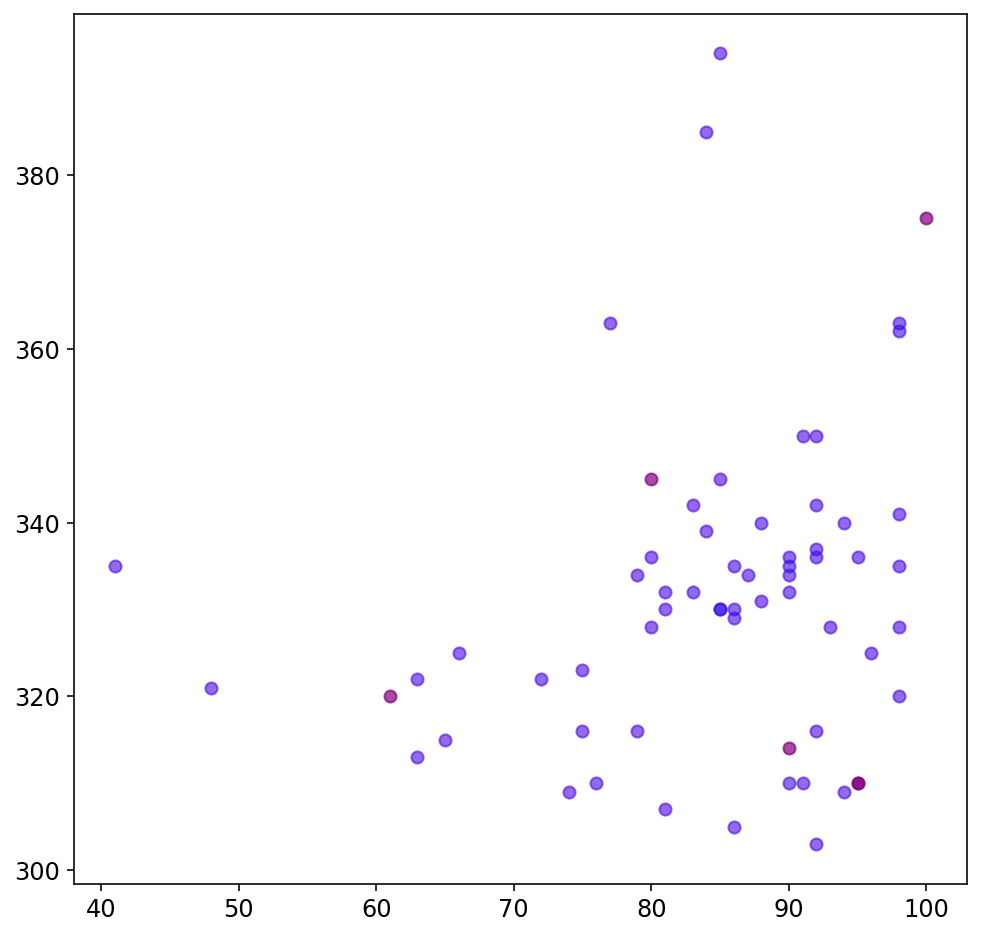

In [387]:
plt.figure(figsize=(8,8))

X_1 = PS_clusters_3.iloc[:,2] #can be changed to plot different axes 
y_1 = PS_clusters_3.iloc[:,4]

# three different graphs, colour coded by cluster, can visualise whether structurally similar compounds have similar properties

#RDK k = 2

plt.scatter(X_1[PS_clusters_3.iloc[:,-3] ==0], y_1[PS_clusters_3.iloc[:,-3] ==0], color = "purple", marker ="o", alpha=0.7)
plt.scatter(X_1[PS_clusters_3.iloc[:,-3] ==1], y_1[PS_clusters_3.iloc[:,-3] ==1], color = "mediumorchid", marker ="o", alpha=0.6)
plt.scatter(X_1[PS_clusters_3.iloc[:,-3] ==1], y_1[PS_clusters_3.iloc[:,-3] ==1], color = "blue", marker ="o", alpha=0.3)

#Mordred k = 3

#plt.scatter(X_1[PS_clusters_3.iloc[:,-2] ==0], y_1[PS_clusters_3.iloc[:,-2] ==0], color = "forestgreen", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_3.iloc[:,-2] ==1], y_1[PS_clusters_3.iloc[:,-2] ==1], color = "teal", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_3.iloc[:,-2] ==2], y_1[PS_clusters_3.iloc[:,-2] ==2], color = "olive", marker ="o", alpha=0.4)

#Morgan k = 6

#plt.scatter(X_1[PS_clusters_3.iloc[:,-1] ==0], y_1[PS_clusters_3.iloc[:,-1] ==0], color = "slategrey", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_3.iloc[:,-1] ==1], y_1[PS_clusters_3.iloc[:,-1] ==1], color = "darkslateblue", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_3.iloc[:,-1] ==2], y_1[PS_clusters_3.iloc[:,-1] ==2], color = "indigo", marker ="o", alpha=0.7)#plt.scatter(X_1[PS_clusters_1.iloc[:,-2] ==0], y_1[PS_clusters_1.iloc[:,-2] ==0], color = "forestgreen", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_3.iloc[:,-1] ==3], y_1[PS_clusters_3.iloc[:,-1] ==3], color = "plum", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_3.iloc[:,-1] ==4], y_1[PS_clusters_3.iloc[:,-1] ==4], color = "fuchsia", marker ="o", alpha=0.7)
#plt.scatter(X_1[PS_clusters_3.iloc[:,-1] ==5], y_1[PS_clusters_3.iloc[:,-1] ==5], color = "crimson", marker ="o", alpha=0.7)

plt.xlim = (min(X_1), 1.05*max(X_1))
plt.ylim = (min(y_1), 1.05*max(y_1))